In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
df = pd.read_csv("heart.csv")

In [195]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##### Age - Yaş
##### Sex - Cinsiyet
##### chest pain type - Göğüs ağrısı tipi
##### resting blood pressure - Dinlenme ensnasında kan değeri
##### serum cholestoral in mg/dl - serum kolestorali
##### fasting blood sugar > 120 mg/dl - Açlık kan şekeri
##### resting electrocardiographic result - dinlenme esnasında elektrokardiyografi sonuçları
##### maximum heart rate achieved - Ulaşılan maksimum kalp atış hızı
##### exercise induced angina - egzersize bağlı anjina
##### oldpeak - Dinlenmeye göre egzersizle indüklenen ST depresyonu
##### slope - zirve egzersiz ST segmentinin eğimi
##### ca - fluoroskopi ile renklendirilmiş ana damar sayısı
##### thal: 0 = normal, 1 = sabit kusur, 2 = tersine çevirilebilir kusur

In [196]:
def editingDtype(data):
    for i in data.columns:
        if data[i].nunique() < 5:
            data[i] = data[i].astype('category')
        else:
            data[i] = data[i].astype('float64')

In [197]:
relationalList = []
def statisticalTest(data, feature):
    from scipy.stats import chi2_contingency
    from scipy.stats import f_oneway
    target = df["target"]
    dataDtype = editingDtype(data)
    if dataDtype == "category":
        crosstab = pd.crosstab(df[feature], target)
        chi2, p, dof, expected = chi2_contingency(crosstab)
        if p < 0.05:
            relationalList.append(feature)
            print(f"{feature} is related to target")
        else:
            print(f"{feature} is not related to target")
    else:
        f, p = f_oneway(df[feature], target)
        if p < 0.05:
            relationalList.append(feature)
            print(f"{feature} is related to target")
        else:
            print(f"{feature} is not related to target")

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [199]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [200]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

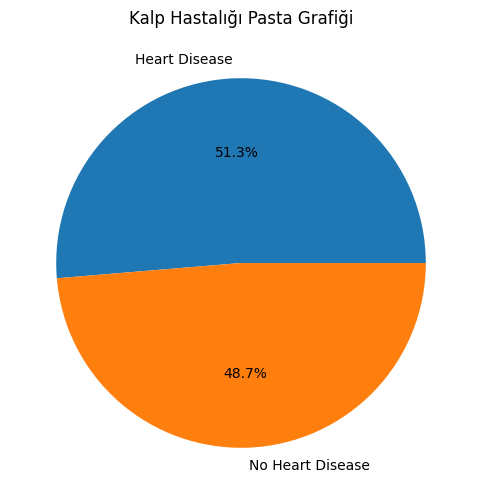

In [201]:
plt.figure(figsize=(10, 6))
plt.title("Kalp Hastalığı Pasta Grafiği")
plt.pie(df["target"].value_counts(), labels=["Heart Disease", "No Heart Disease"], autopct="%1.1f%%")
plt.show()

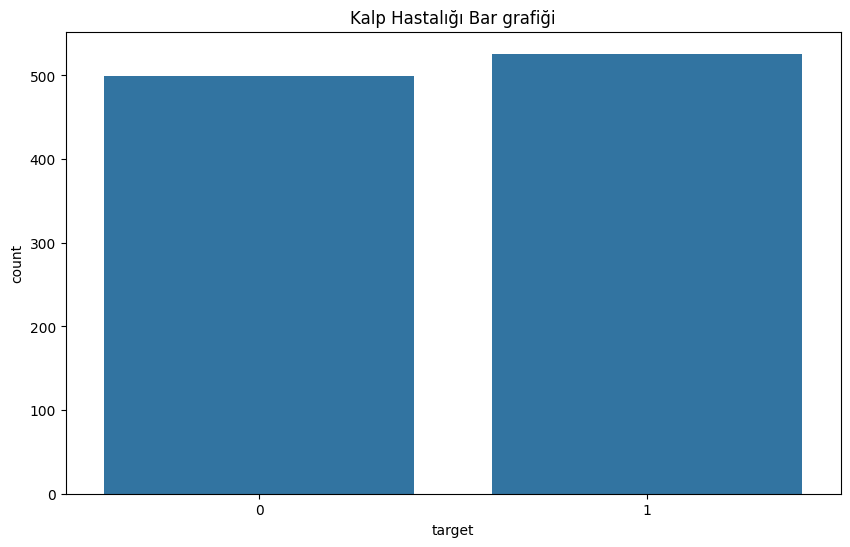

In [202]:
plt.figure(figsize=(10, 6))
plt.title("Kalp Hastalığı Bar grafiği")
sns.countplot(x="target", data=df)
plt.show()

Buradan da görebileceğimiz üzere çoğunluk hastalığa sahiptir

In [203]:
# Yaş

In [204]:
df["age"].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

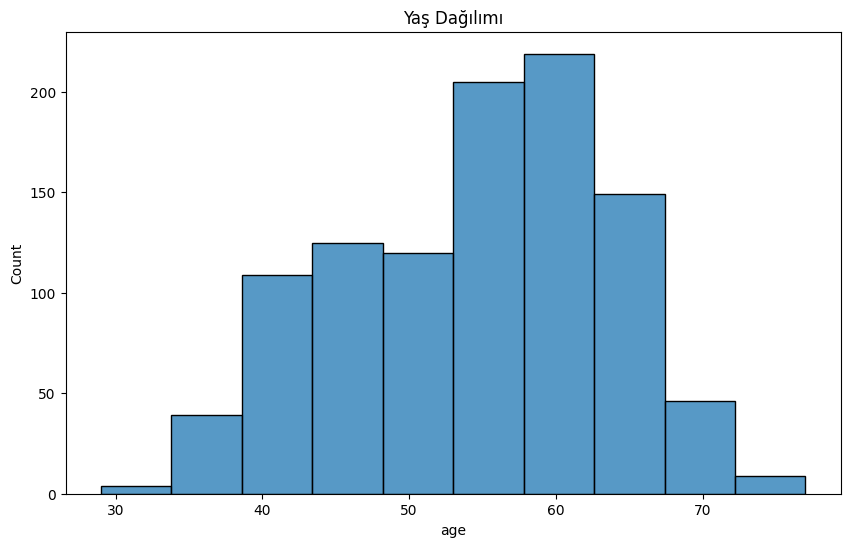

In [205]:
plt.figure(figsize=(10, 6))
plt.title("Yaş Dağılımı")
sns.histplot(df["age"], bins=10)
plt.show()

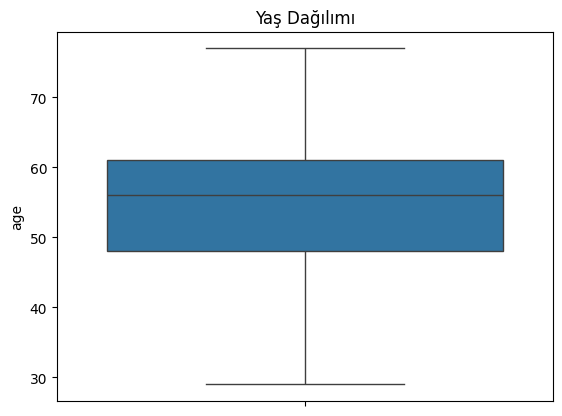

In [206]:
plt.title("Yaş Dağılımı")
sns.boxplot(y="age", data=df)
plt.show()

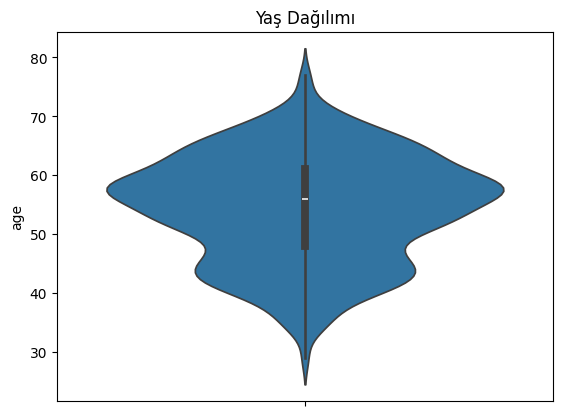

In [207]:
plt.title("Yaş Dağılımı")
sns.violinplot(y="age", data=df)
plt.show()

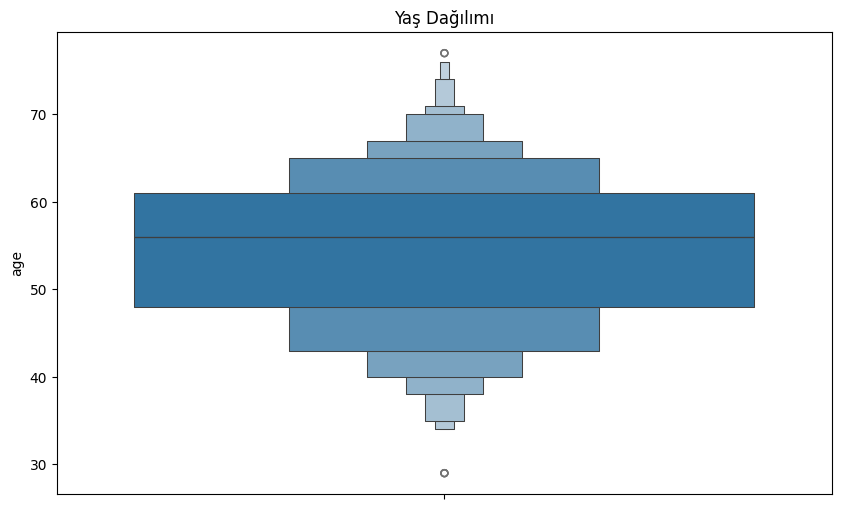

In [208]:
plt.figure(figsize=(10, 6))
plt.title("Yaş Dağılımı")
sns.boxenplot(y="age",data=df)
plt.show()

C:\Users\Veli\AppData\Local\Temp\ipykernel_23160\3503272359.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["age"], shade=True)


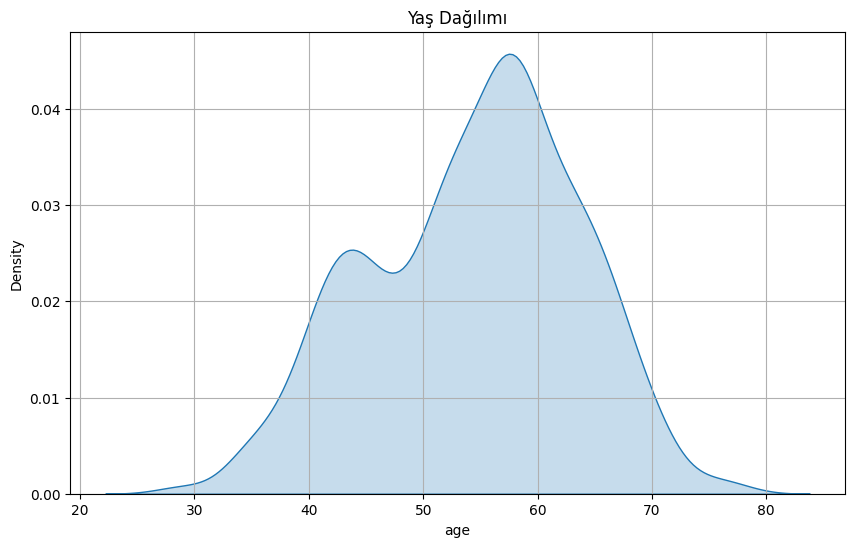

In [209]:
plt.figure(figsize=(10, 6))
plt.title("Yaş Dağılımı")
sns.kdeplot(df["age"], shade=True)
plt.grid(True)
plt.show()

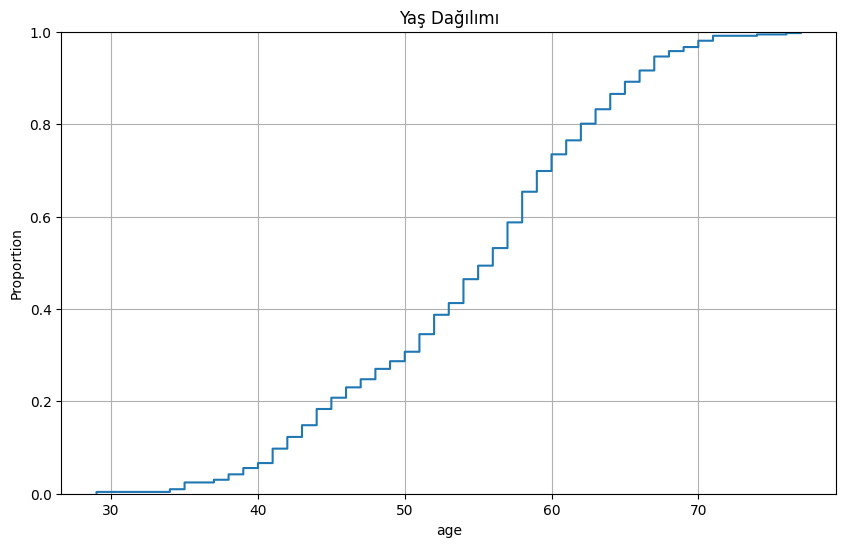

In [210]:
plt.figure(figsize=(10, 6))
plt.title("Yaş Dağılımı")
sns.ecdfplot(df["age"])
plt.grid(True)
plt.show()

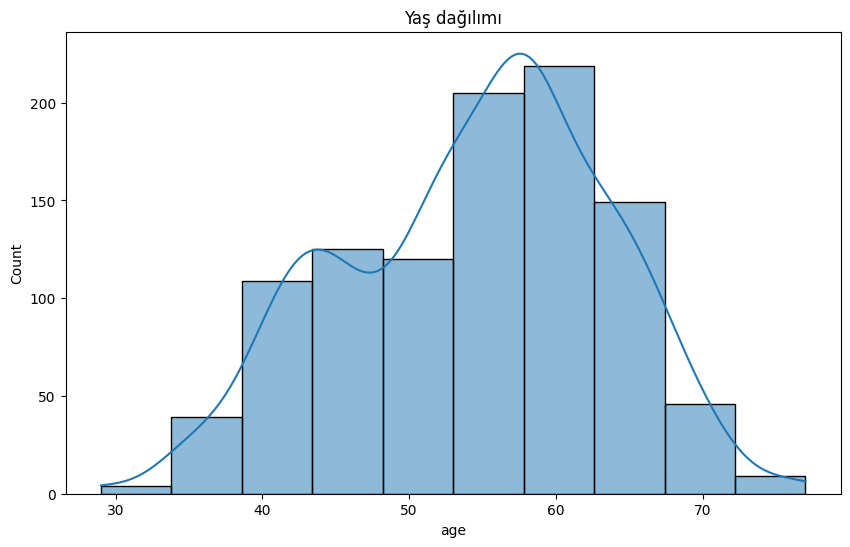

In [211]:
plt.figure(figsize=(10, 6))
plt.title("Yaş dağılımı")
sns.histplot(df["age"], bins=10, kde=True)
plt.show()

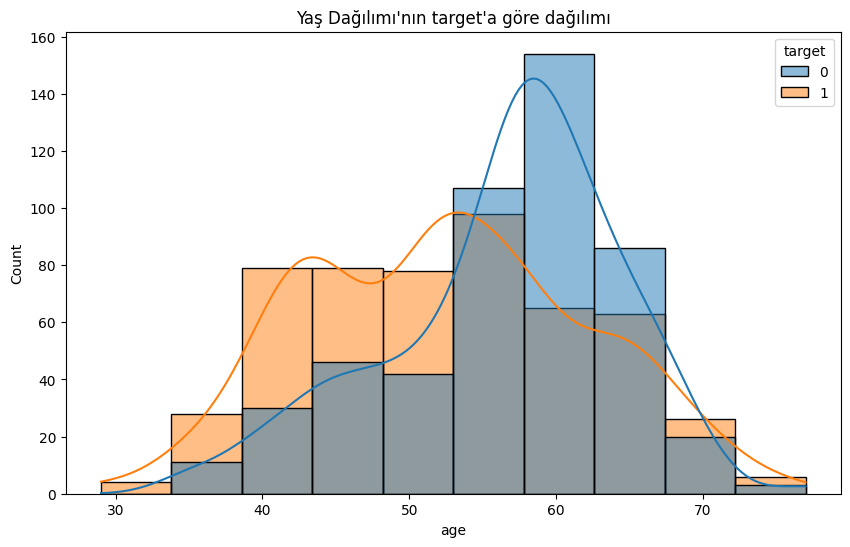

In [212]:
plt.figure(figsize=(10, 6))
plt.title("Yaş Dağılımı'nın target'a göre dağılımı")    
sns.histplot(x="age", data=df, hue="target", bins=10, kde=True)
plt.show()

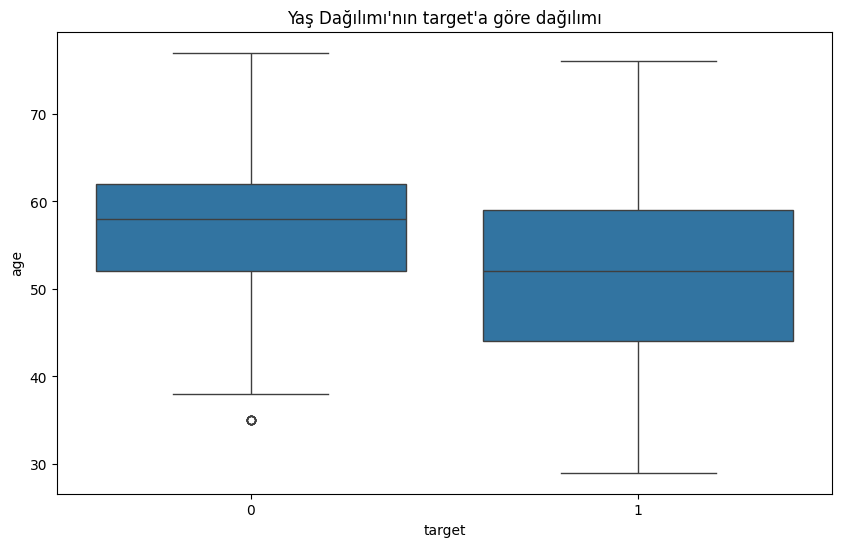

In [213]:
plt.figure(figsize=(10, 6))
plt.title("Yaş Dağılımı'nın target'a göre dağılımı")
sns.boxplot(x="target", y="age", data=df)
plt.show()

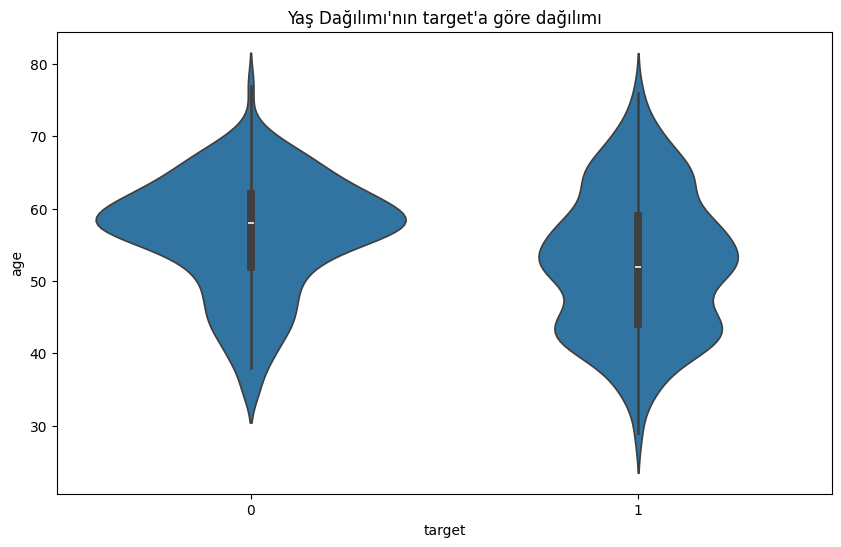

In [214]:
plt.figure(figsize=(10, 6))
plt.title("Yaş Dağılımı'nın target'a göre dağılımı")
sns.violinplot(x="target", y="age", data=df)
plt.show()

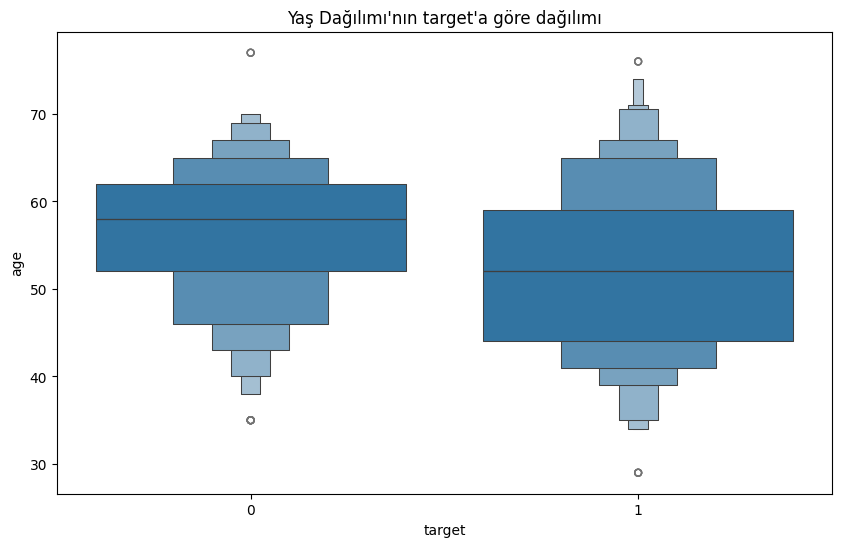

In [215]:
plt.figure(figsize=(10, 6))
plt.title("Yaş Dağılımı'nın target'a göre dağılımı")
sns.boxenplot(x="target", y="age", data=df)
plt.show()

C:\Users\Veli\AppData\Local\Temp\ipykernel_23160\1302807703.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="age", hue="target", data=df, shade=True)


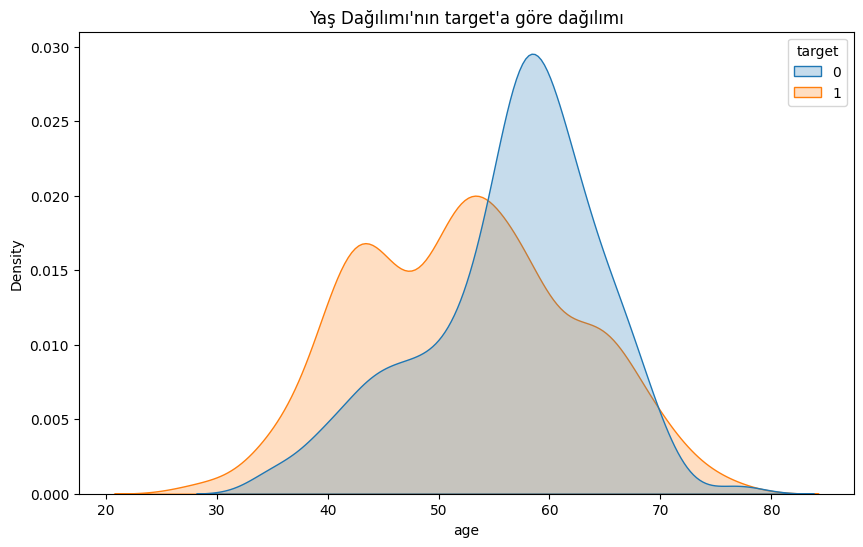

In [216]:
plt.figure(figsize=(10, 6))
plt.title("Yaş Dağılımı'nın target'a göre dağılımı")
sns.kdeplot(x="age", hue="target", data=df, shade=True)
plt.show()

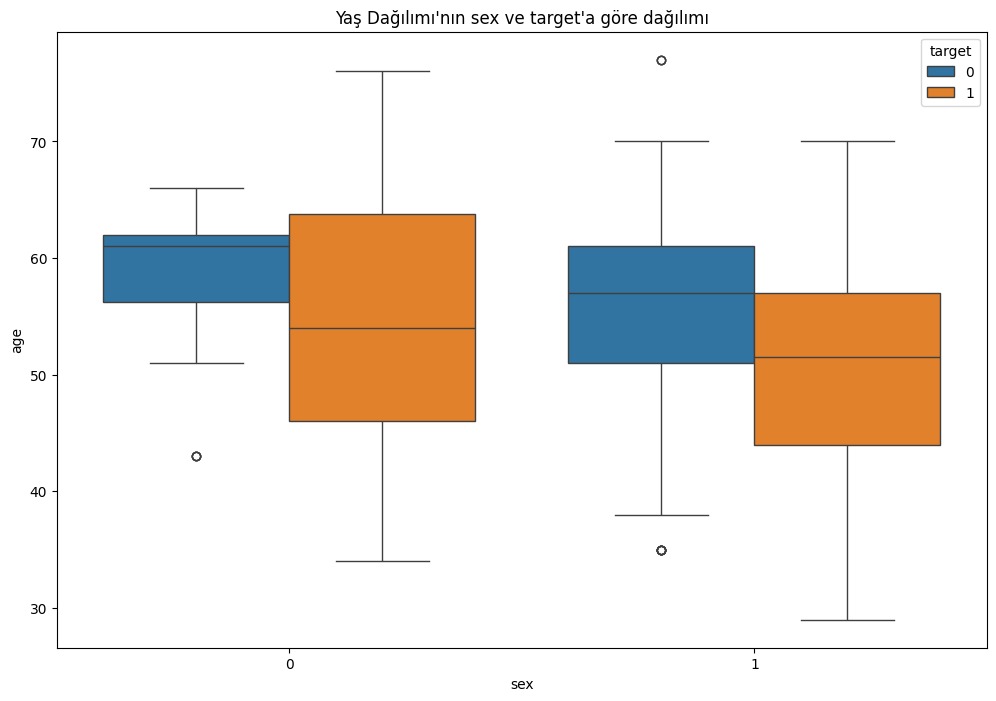

In [217]:
plt.figure(figsize=(12, 8))
plt.title("Yaş Dağılımı'nın sex ve target'a göre dağılımı")
sns.boxplot(x="sex", y="age", hue="target", data=df)
plt.show()

In [218]:
statisticalTest(df, "age")

age is related to target


In [219]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2.0,3,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0.0,3,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0.0,3,0
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1.0,3,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3.0,2,0


In [220]:
# SEX

In [221]:
df["sex"].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [222]:
df["sex"].describe()

count     1025
unique       2
top          1
freq       713
Name: sex, dtype: int64

C:\Users\Veli\AppData\Local\Temp\ipykernel_23160\3645379191.py:4: UserWarning: Legend does not support handles for int instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([0, 1], ["Female", "Male"], loc="upper right")


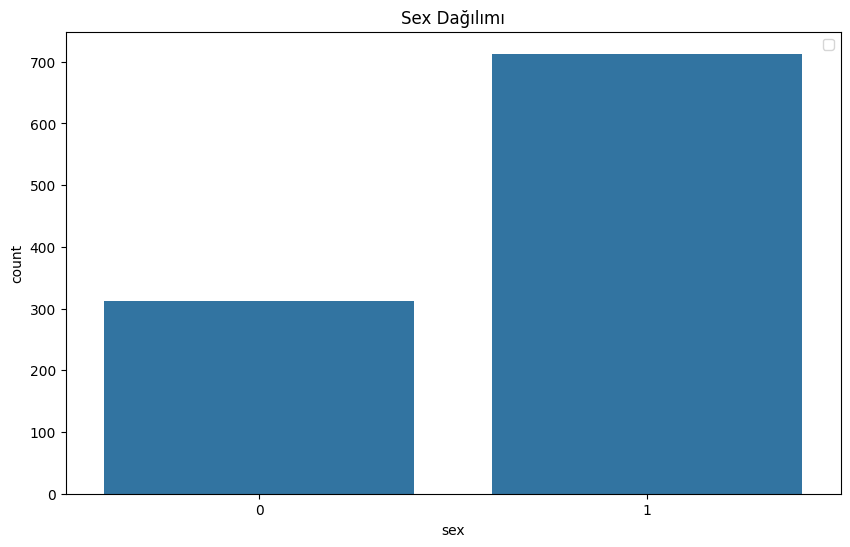

In [223]:
plt.figure(figsize=(10, 6))
plt.title("Sex Dağılımı")
sns.countplot(x="sex", data=df)
plt.legend([0, 1], ["Female", "Male"], loc="upper right")
plt.show()

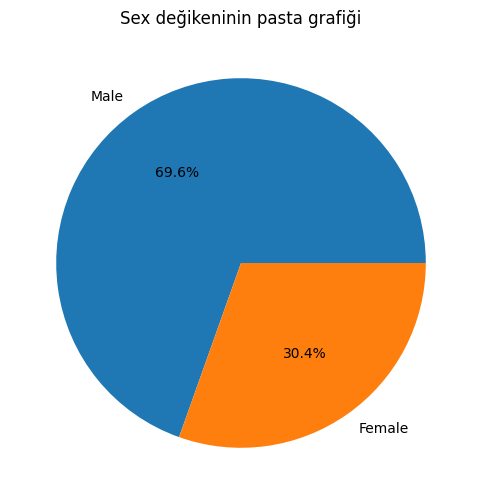

In [224]:
plt.figure(figsize=(10, 6))
plt.title("Sex değikeninin pasta grafiği")
plt.pie(df["sex"].value_counts(), labels=["Male", "Female"], autopct="%1.1f%%")
plt.show()

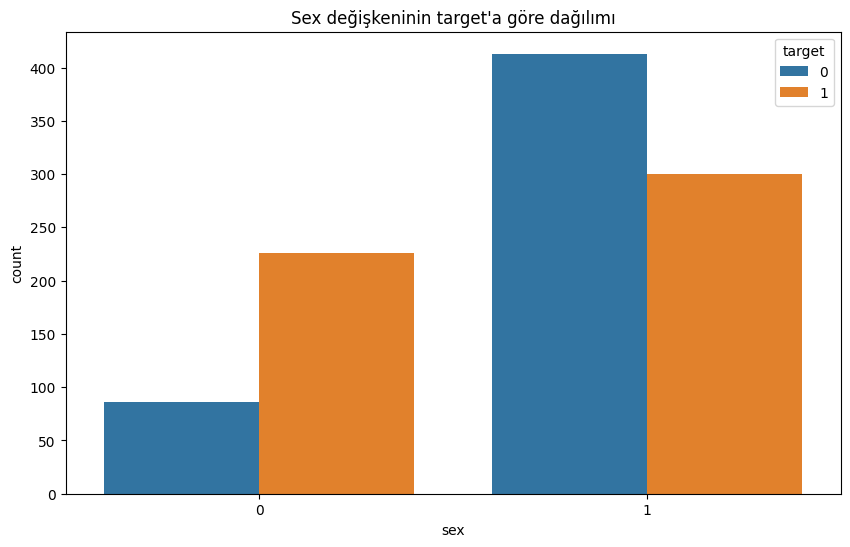

In [225]:
plt.figure(figsize=(10, 6))
plt.title("Sex değişkeninin target'a göre dağılımı")
sns.countplot(x="sex", hue="target", data=df)
plt.show()

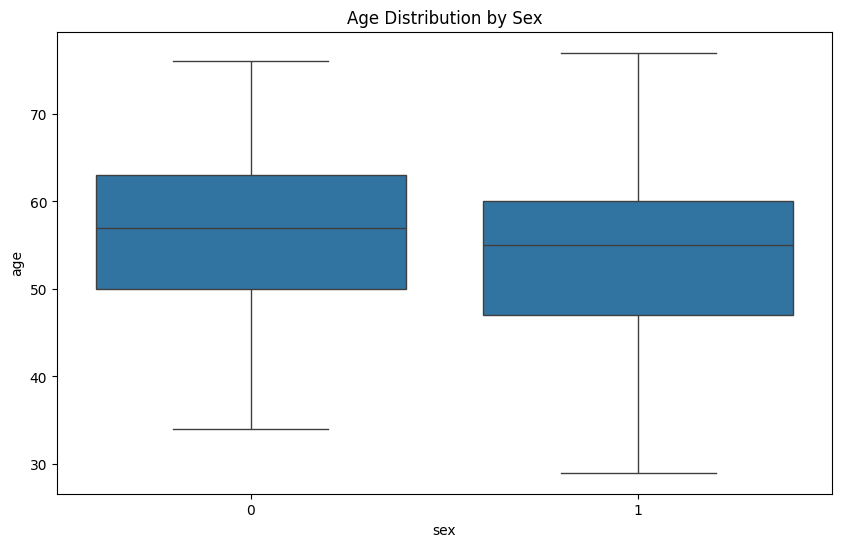

In [226]:
plt.figure(figsize=(10, 6))
plt.title("Age Distribution by Sex")
sns.boxplot(x="sex", y="age", data=df)
plt.show()

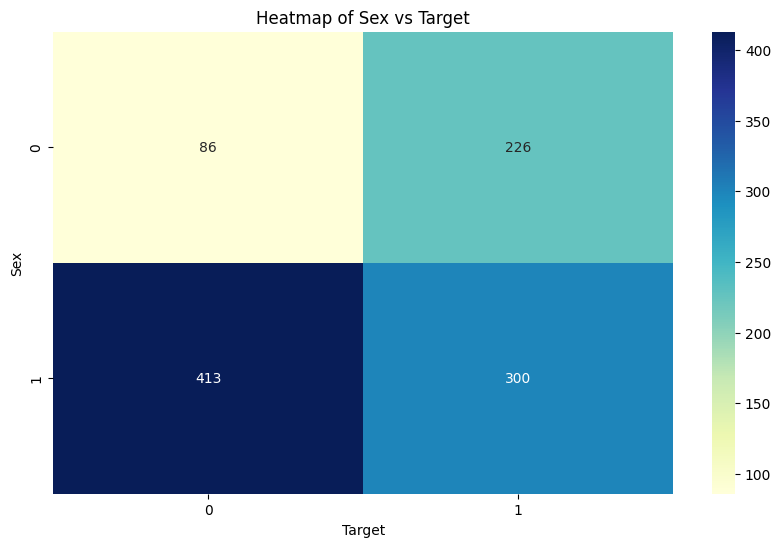

In [227]:
# Create a crosstab of sex and target
crosstab = pd.crosstab(df['sex'], df['target'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.title("Heatmap of Sex vs Target")
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Target")
plt.ylabel("Sex")
plt.show()

In [228]:
statisticalTest(df, "sex")

sex is related to target


In [229]:
 # cp

In [230]:
df["cp"].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [231]:
df["cp"].describe()

count     1025
unique       4
top          0
freq       497
Name: cp, dtype: int64

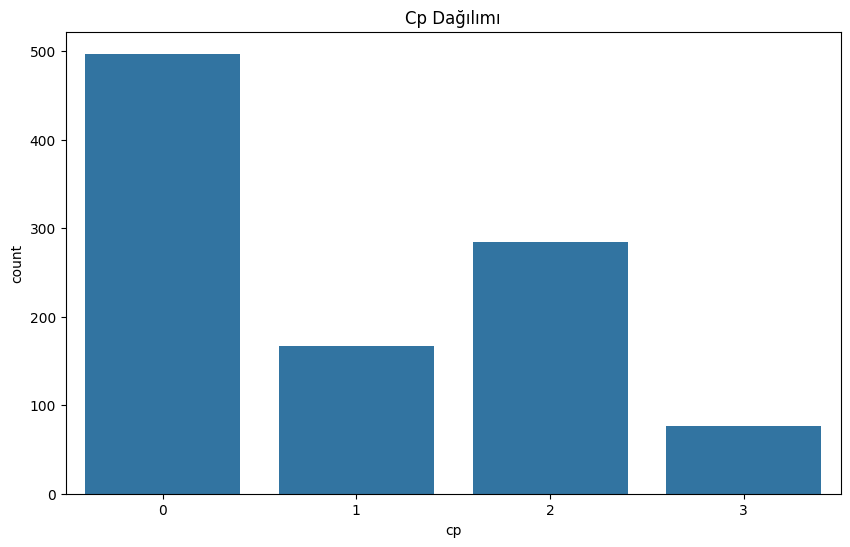

In [232]:
plt.figure(figsize=(10, 6))
plt.title("Cp Dağılımı")
sns.countplot(x="cp", data=df)
plt.show()


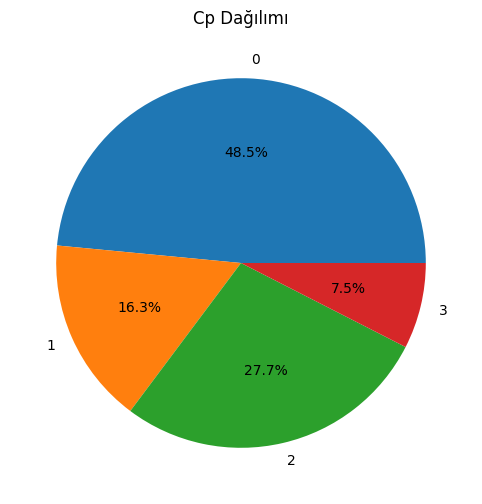

In [233]:
plt.figure(figsize=(10, 6))
plt.title("Cp Dağılımı")
plt.pie(df["cp"].value_counts().sort_index(), labels=["0", "1", "2", "3"], autopct="%1.1f%%")
plt.show()

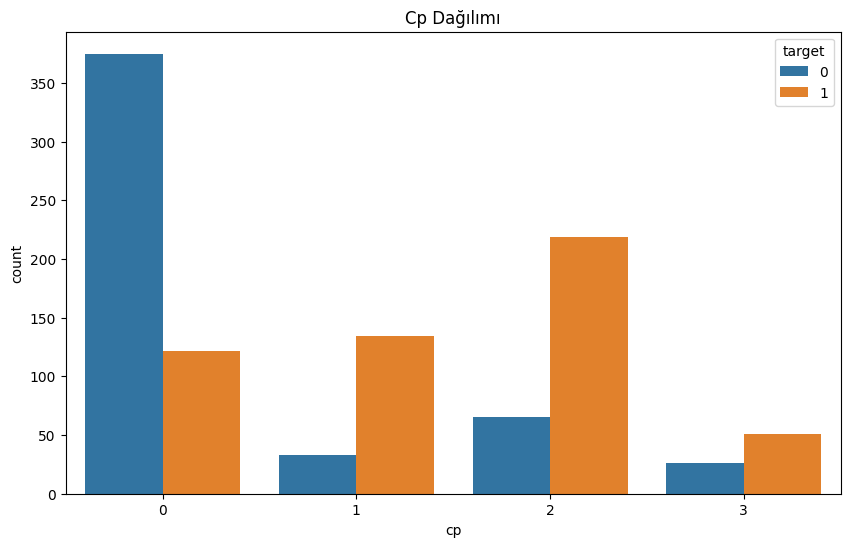

In [234]:
plt.figure(figsize=(10, 6))
plt.title("Cp Dağılımı")
sns.countplot(x="cp", hue="target", data=df)
plt.show()

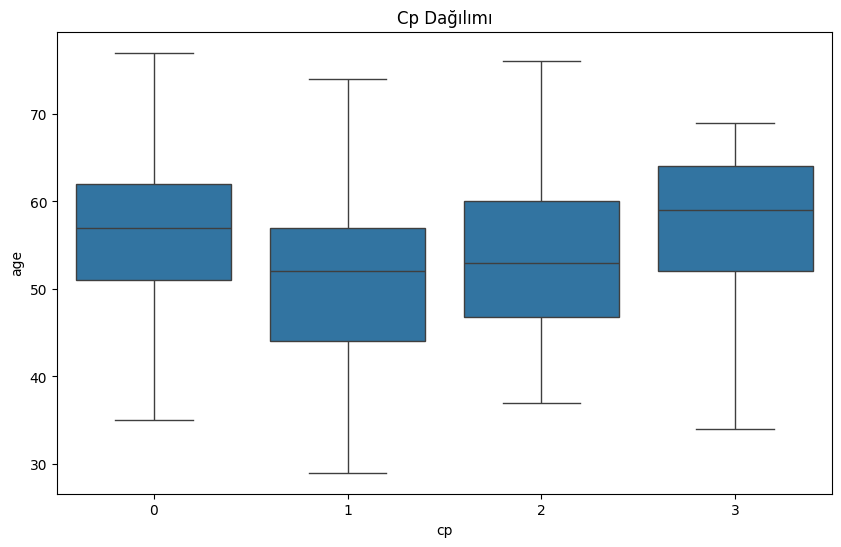

In [235]:
plt.figure(figsize=(10, 6))
plt.title("Cp Dağılımı")
sns.boxplot(x="cp", y="age", data=df)
plt.show()

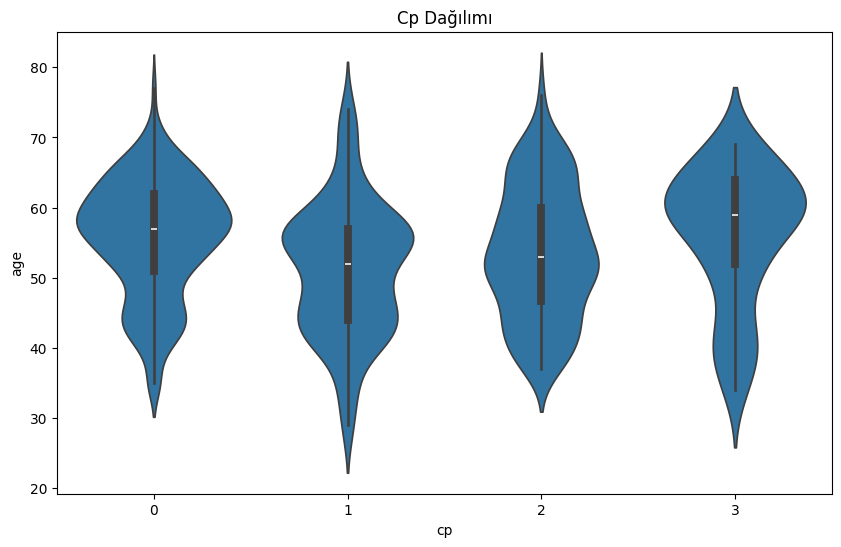

In [236]:
plt.figure(figsize=(10, 6))
plt.title("Cp Dağılımı")
sns.violinplot(x="cp", y="age", data=df)
plt.show()

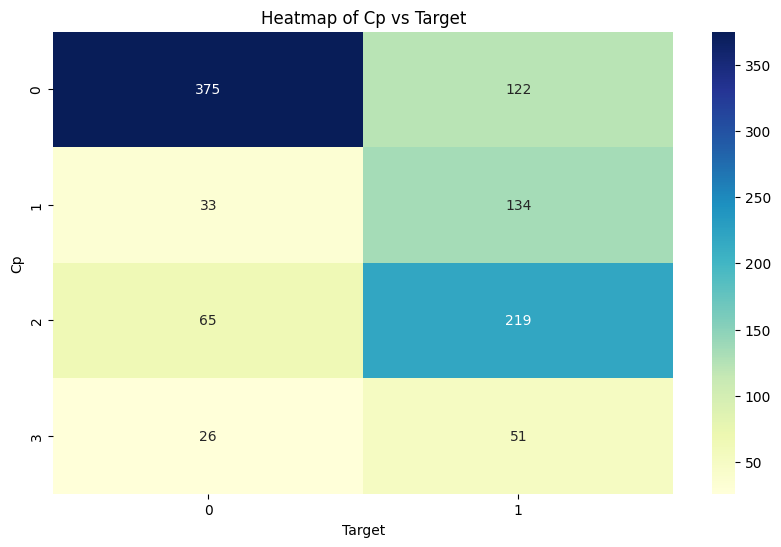

In [237]:
crosstab = pd.crosstab(df["cp"], df["target"])
plt.figure(figsize=(10, 6))
plt.title("Heatmap of Cp vs Target")
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Target")
plt.ylabel("Cp")
plt.show()

In [238]:
statisticalTest(df, "cp")

cp is related to target


In [239]:
# trestbps

In [240]:
df["trestbps"].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

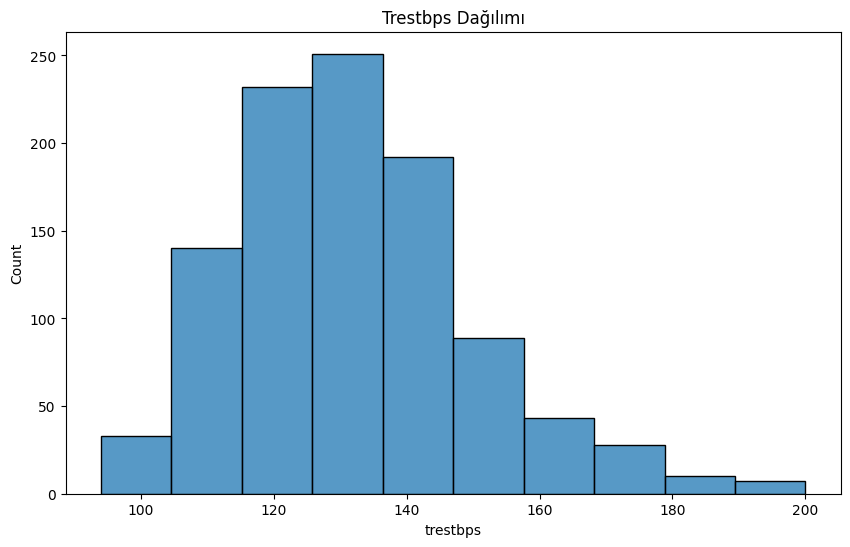

In [241]:
plt.figure(figsize=(10, 6))
plt.title("Trestbps Dağılımı")
sns.histplot(df["trestbps"], bins=10)
plt.show()

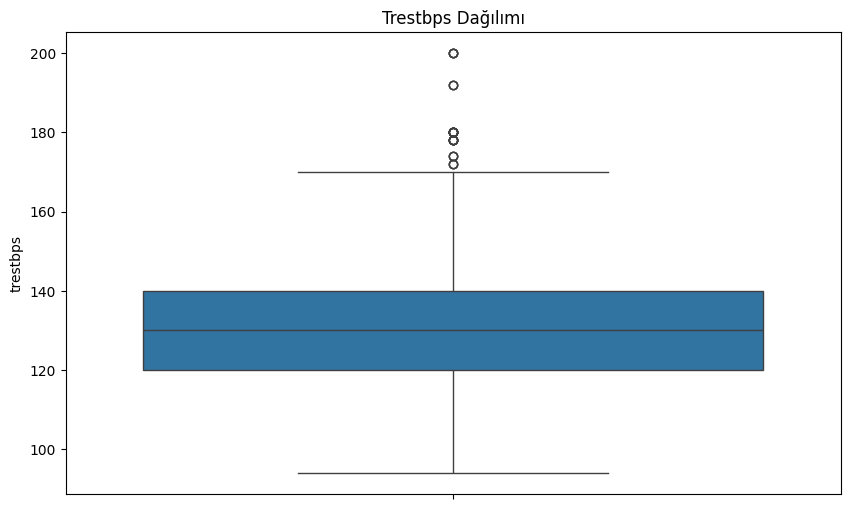

In [242]:
plt.figure(figsize=(10, 6))
plt.title("Trestbps Dağılımı")
sns.boxplot(y="trestbps", data=df)
plt.show()

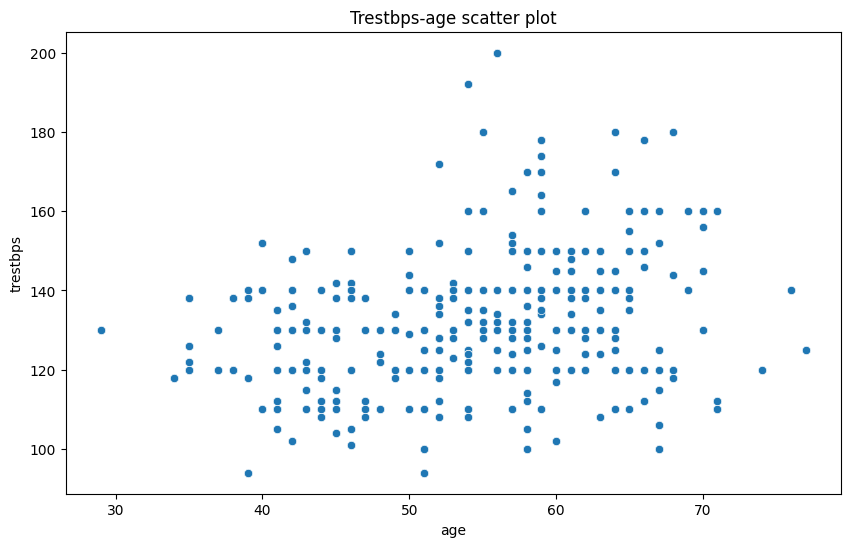

In [243]:
plt.figure(figsize=(10, 6))
plt.title("Trestbps-age scatter plot")
sns.scatterplot(x="age", y="trestbps", data=df)
plt.show()

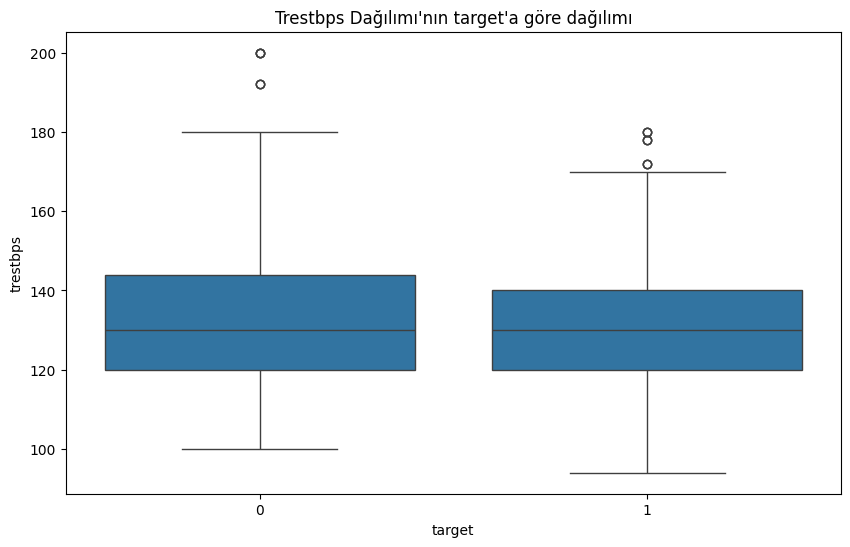

In [244]:
# Box plot of trestbps by target
plt.figure(figsize=(10, 6))
plt.title("Trestbps Dağılımı'nın target'a göre dağılımı")
sns.boxplot(x="target", y="trestbps", data=df)
plt.show()

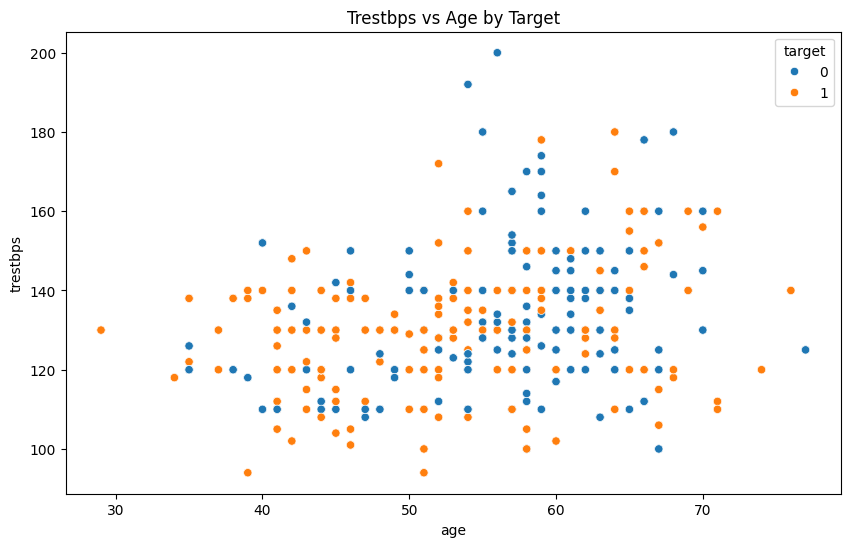

In [245]:
# Scatter plot of trestbps by target
plt.figure(figsize=(10, 6))
plt.title("Trestbps vs Age by Target")
sns.scatterplot(x="age", y="trestbps", hue="target", data=df)
plt.show()

In [246]:
statisticalTest(df, "trestbps")

trestbps is related to target


In [247]:
# chol

In [248]:
df["chol"].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

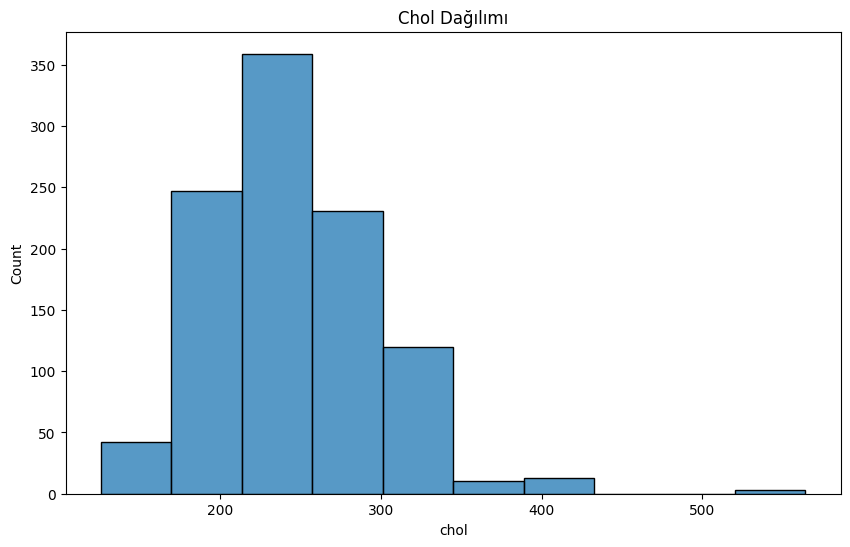

In [249]:
plt.figure(figsize=(10, 6))
plt.title("Chol Dağılımı")
sns.histplot(df["chol"], bins=10)
plt.show()

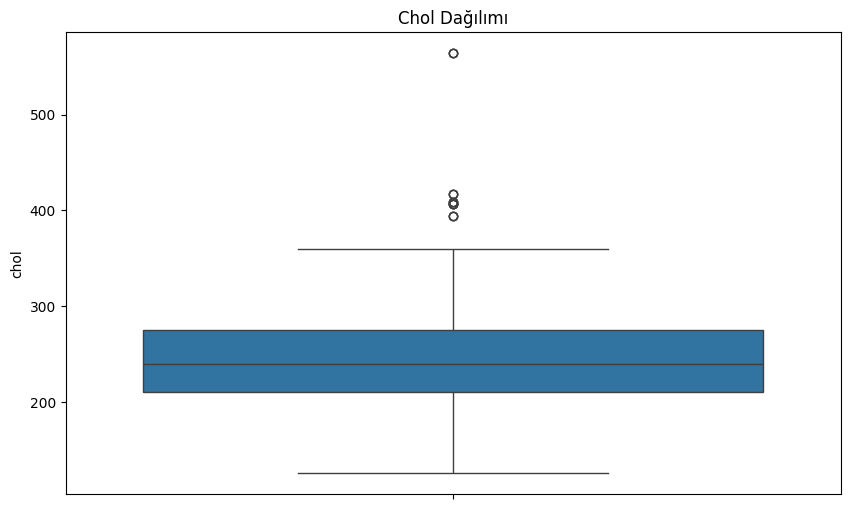

In [250]:
plt.figure(figsize=(10, 6))
plt.title("Chol Dağılımı")
sns.boxplot(y="chol", data=df)
plt.show()

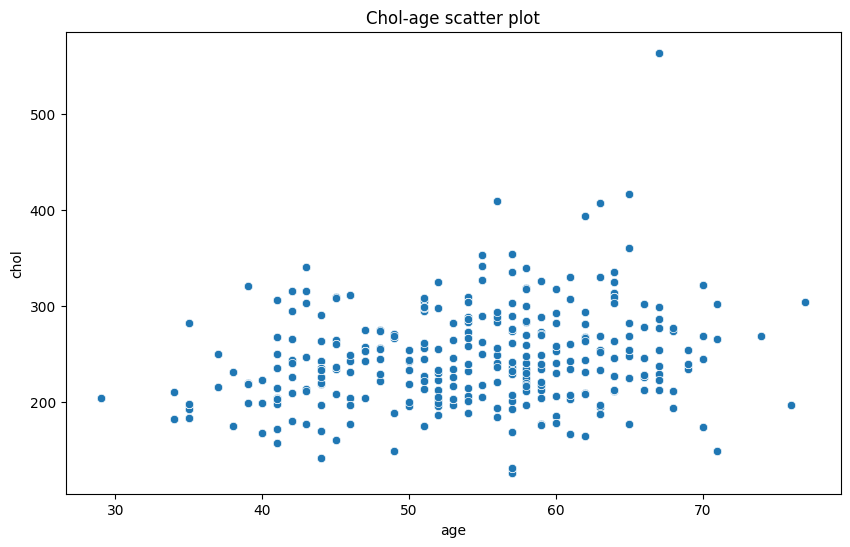

In [251]:
plt.figure(figsize=(10, 6))
plt.title("Chol-age scatter plot")
sns.scatterplot(x="age", y="chol", data=df)
plt.show()

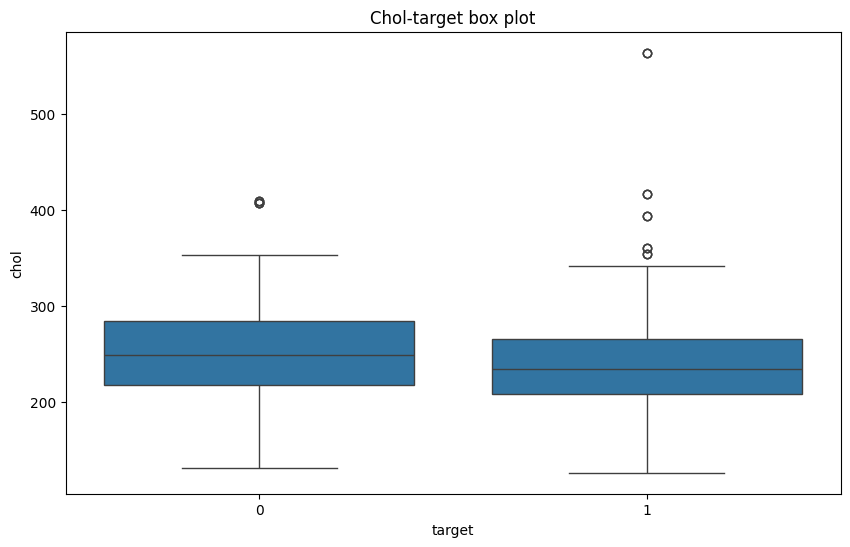

In [252]:
plt.figure(figsize=(10, 6))
plt.title("Chol-target box plot")
sns.boxplot(x="target", y="chol", data=df)
plt.show()

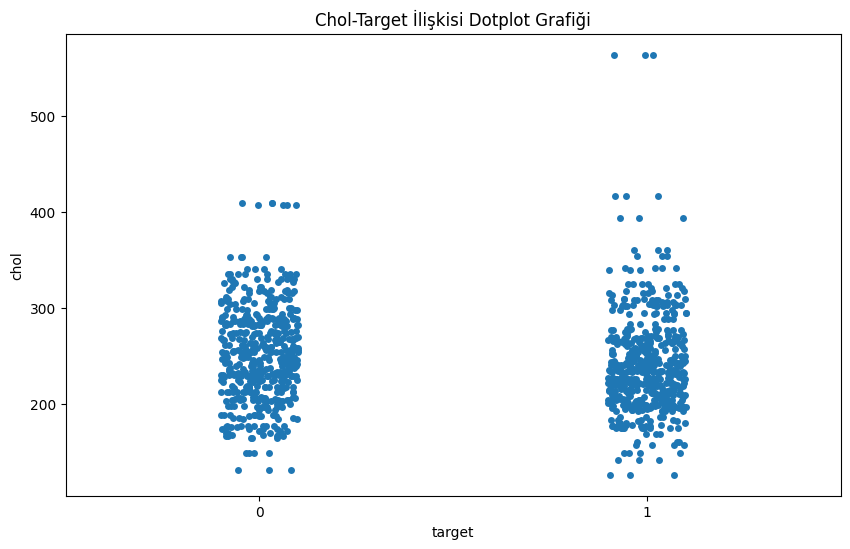

In [253]:
plt.figure(figsize=(10, 6))
plt.title("Chol-Target İlişkisi Dotplot Grafiği")
sns.stripplot(y="chol", x="target", data=df, jitter=True)
plt.show()

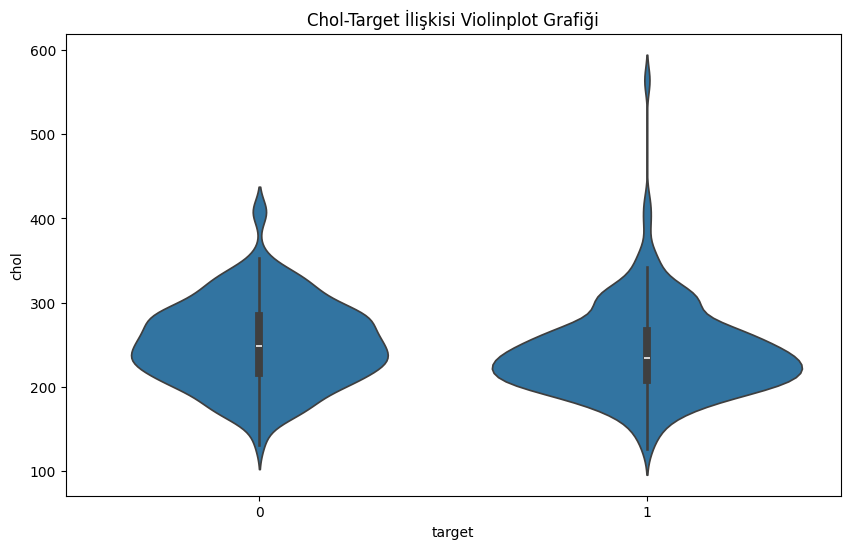

In [254]:
plt.figure(figsize=(10, 6))
plt.title("Chol-Target İlişkisi Violinplot Grafiği")
sns.violinplot(x="target", y="chol", data=df)
plt.show()

In [255]:
statisticalTest(df, "chol")

chol is related to target


In [256]:
# fps

In [257]:
df["fbs"].value_counts()

fbs
0    872
1    153
Name: count, dtype: int64

In [258]:
df["fbs"].describe()

count     1025
unique       2
top          0
freq       872
Name: fbs, dtype: int64

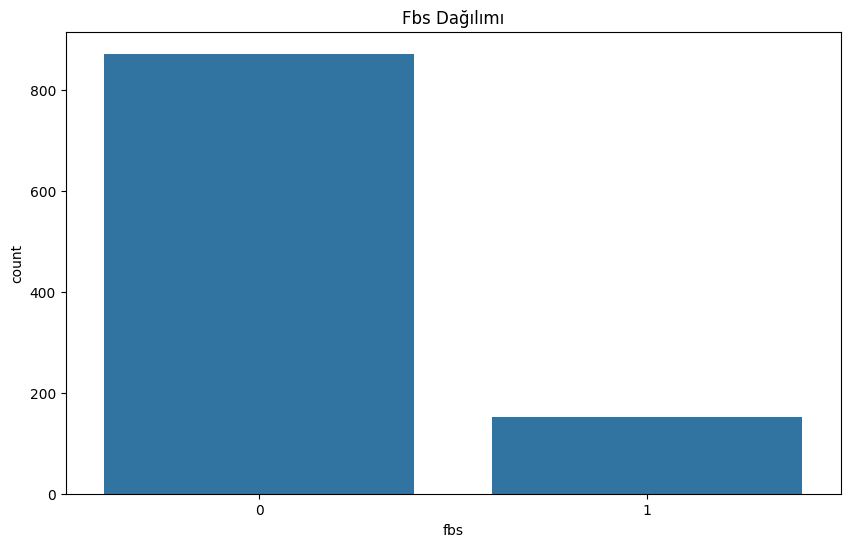

In [259]:
plt.figure(figsize=(10, 6))
plt.title("Fbs Dağılımı")
sns.countplot(x="fbs", data=df)
plt.show()

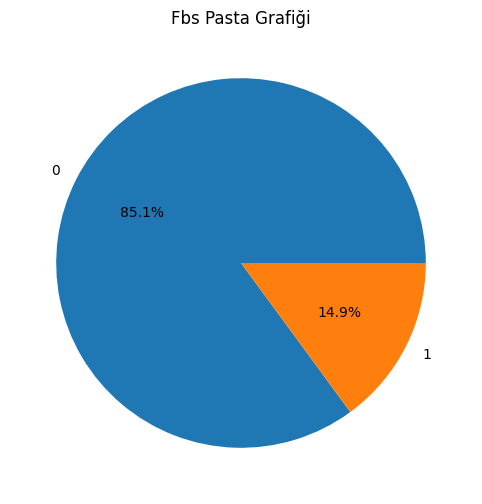

In [260]:
plt.figure(figsize=(10, 6))
plt.title("Fbs Pasta Grafiği")
plt.pie(df["fbs"].value_counts(), labels=["0", "1"], autopct="%1.1f%%")
plt.show()

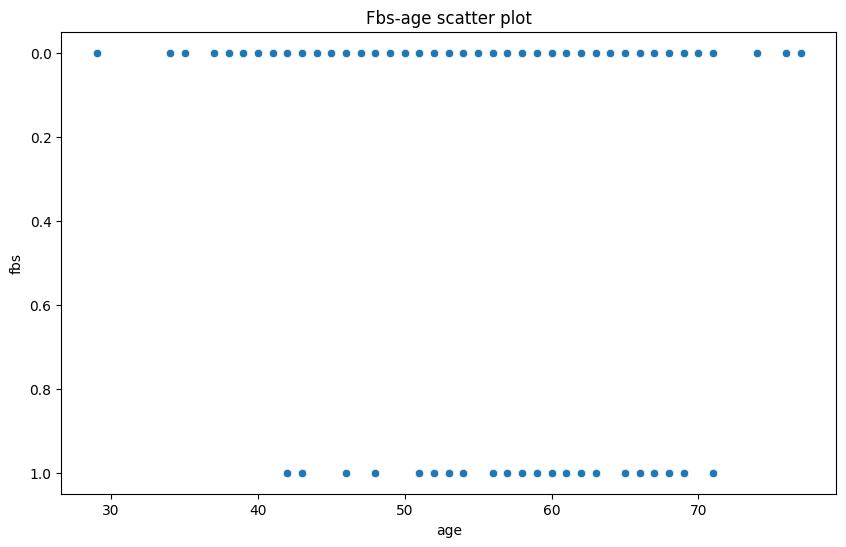

In [261]:
plt.figure(figsize=(10, 6))
plt.title("Fbs-age scatter plot")
sns.scatterplot(x="age", y="fbs", data=df)
plt.show()

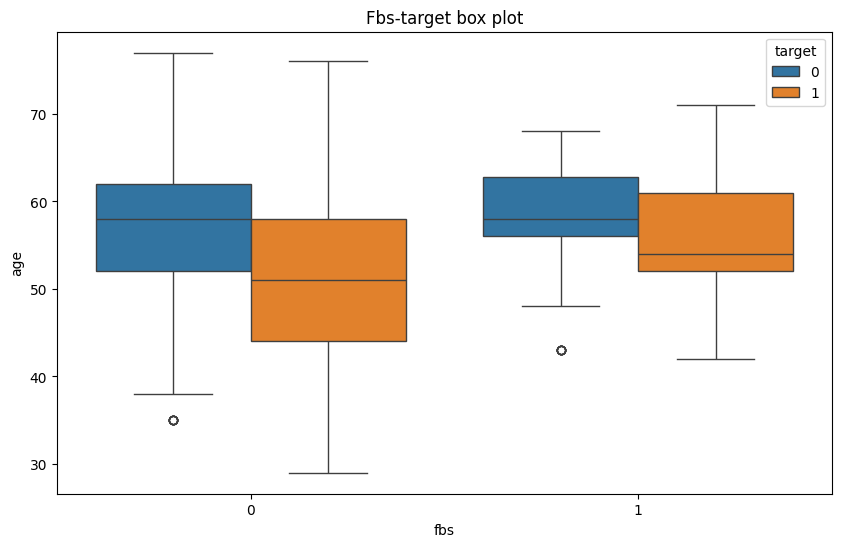

In [262]:
plt.figure(figsize=(10, 6))
plt.title("Fbs-target box plot")
sns.boxplot(y="age", x="fbs", hue="target", data=df)
plt.show()

<Axes: xlabel='fbs'>

<Figure size 1000x600 with 0 Axes>

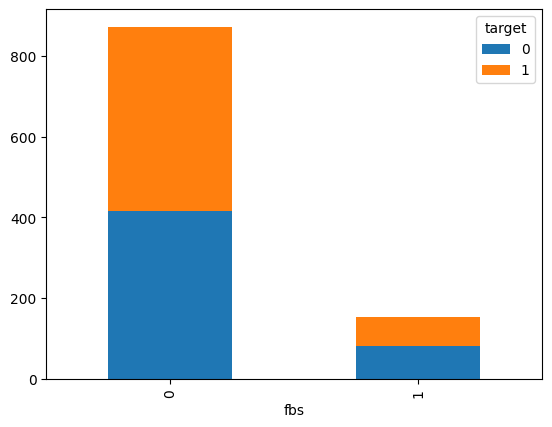

In [263]:
plt.figure(figsize=(10, 6))
crosstab = pd.crosstab(df["fbs"], df["target"])
crosstab.plot(kind="bar", stacked=True)

<Axes: xlabel='target', ylabel='fbs'>

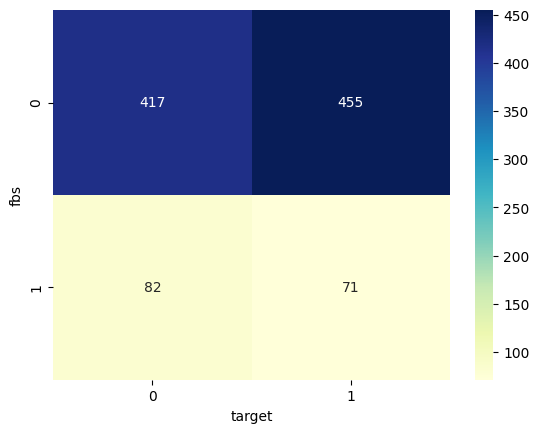

In [264]:
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")

In [265]:
statisticalTest(df, "fbs")

fbs is related to target


In [266]:
# restecg

In [267]:
df["restecg"].value_counts()

restecg
1    513
0    497
2     15
Name: count, dtype: int64

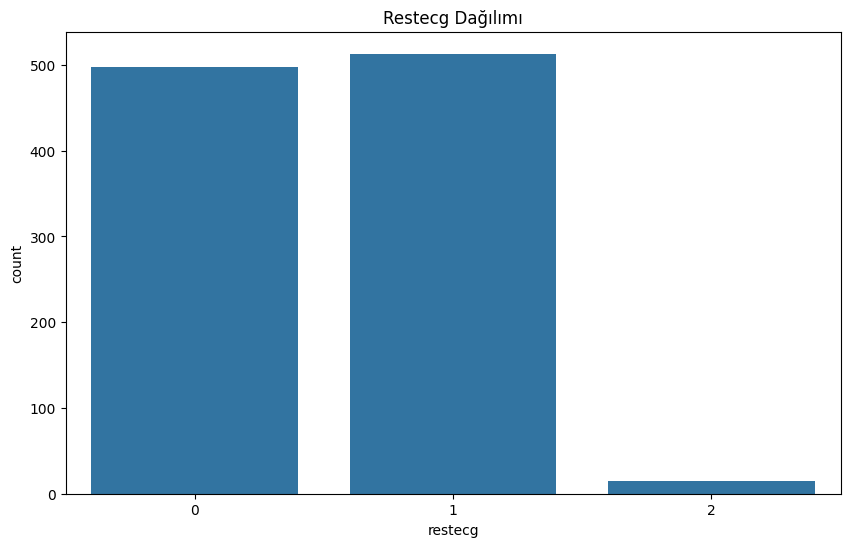

In [268]:
plt.figure(figsize=(10, 6))
plt.title("Restecg Dağılımı")
sns.countplot(x="restecg", data=df)
plt.show()

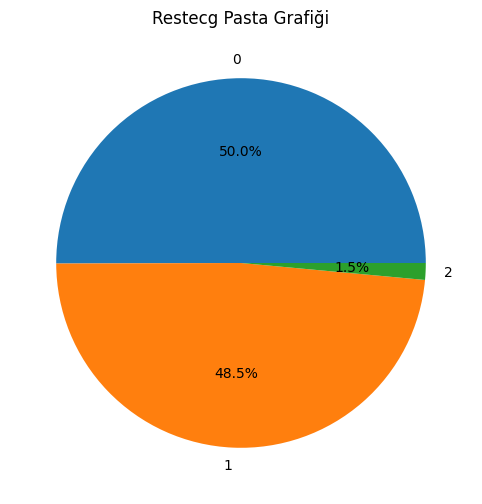

In [269]:
plt.figure(figsize=(10, 6))
plt.title("Restecg Pasta Grafiği")
plt.pie(df["restecg"].value_counts(), labels=["0", "1", "2"], autopct="%1.1f%%")
plt.show()

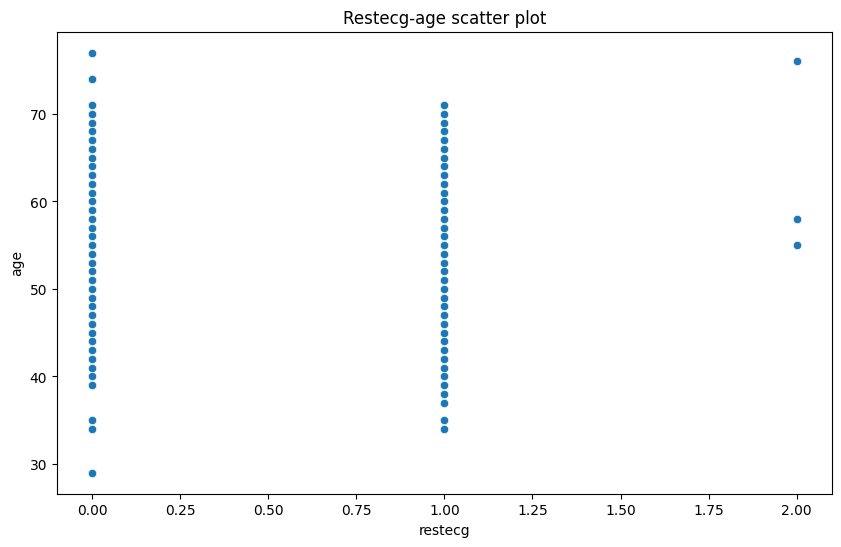

In [270]:
plt.figure(figsize=(10, 6))
plt.title("Restecg-age scatter plot")
sns.scatterplot(y="age", x="restecg", data=df)
plt.show()

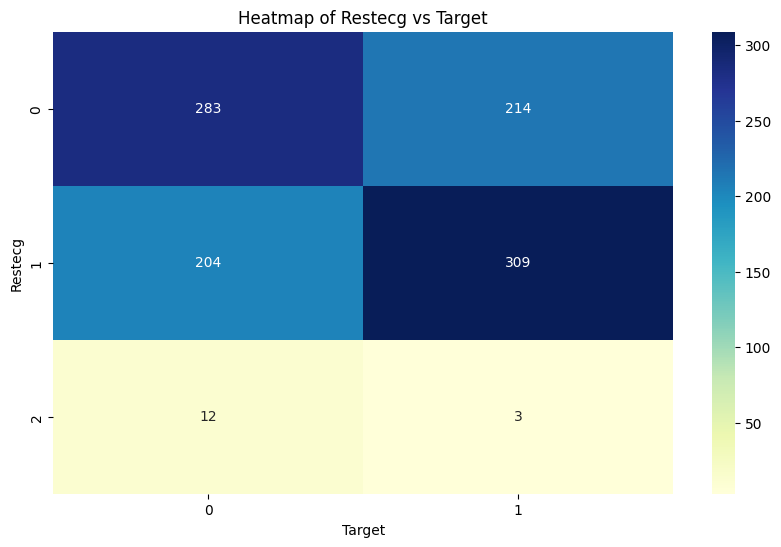

In [271]:
# Create a crosstab of restecg and target
crosstab_restecg_target = pd.crosstab(df['restecg'], df['target'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.title("Heatmap of Restecg vs Target")
sns.heatmap(crosstab_restecg_target, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Target")
plt.ylabel("Restecg")
plt.show()

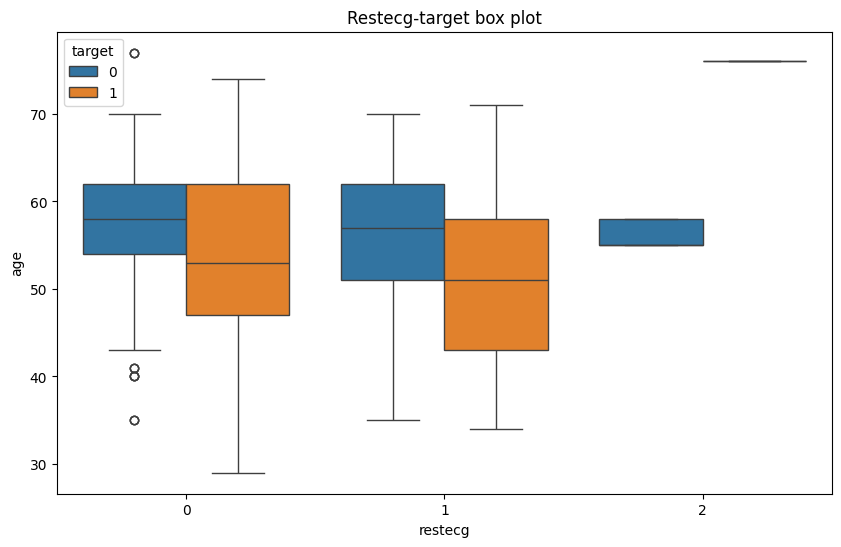

In [272]:
plt.figure(figsize=(10, 6))
plt.title("Restecg-target box plot")
sns.boxplot(y="age", x="restecg", hue="target", data=df)
plt.show()

In [273]:
statisticalTest(df, "restecg")

restecg is not related to target


In [274]:
# thalach

In [275]:
df["thalach"].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

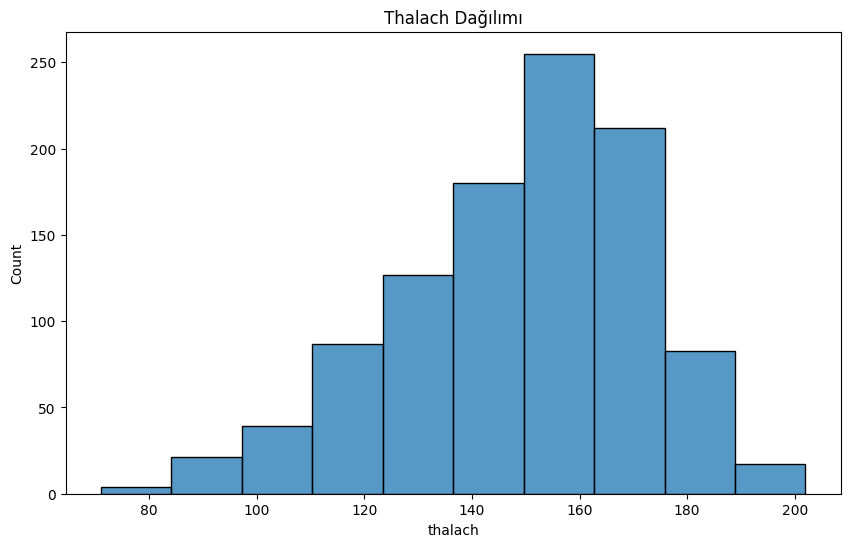

In [276]:
plt.figure(figsize=(10, 6))
plt.title("Thalach Dağılımı")
sns.histplot(df["thalach"], bins=10)
plt.show()

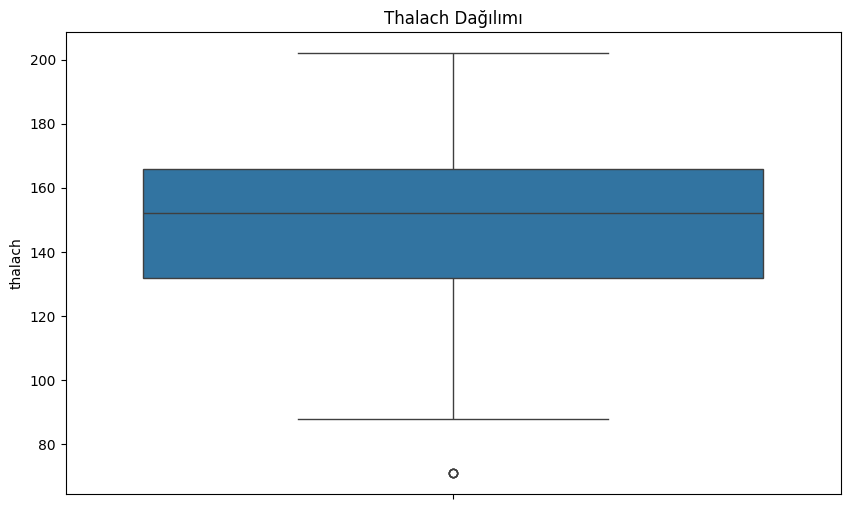

In [277]:
plt.figure(figsize=(10, 6))
plt.title("Thalach Dağılımı")
sns.boxplot(y="thalach", data=df)
plt.show()

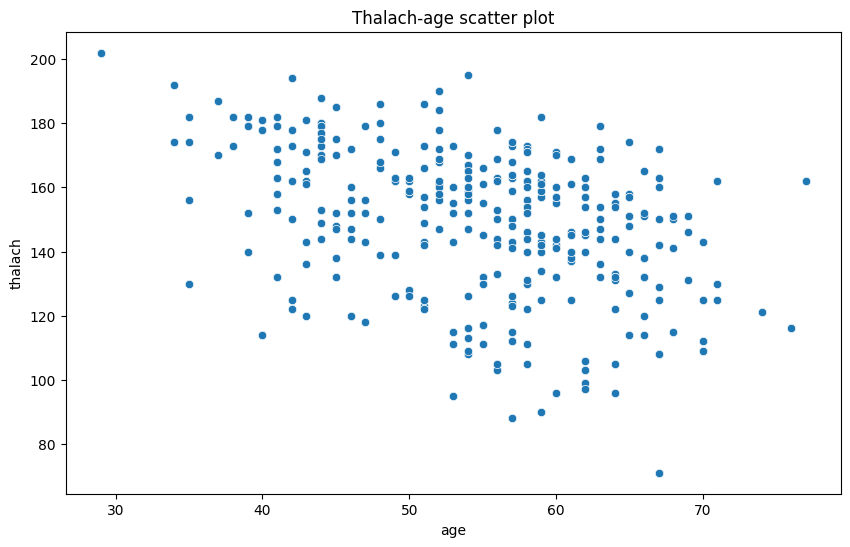

In [278]:
plt.figure(figsize=(10, 6))
plt.title("Thalach-age scatter plot")
sns.scatterplot(x="age", y="thalach", data=df)
plt.show()

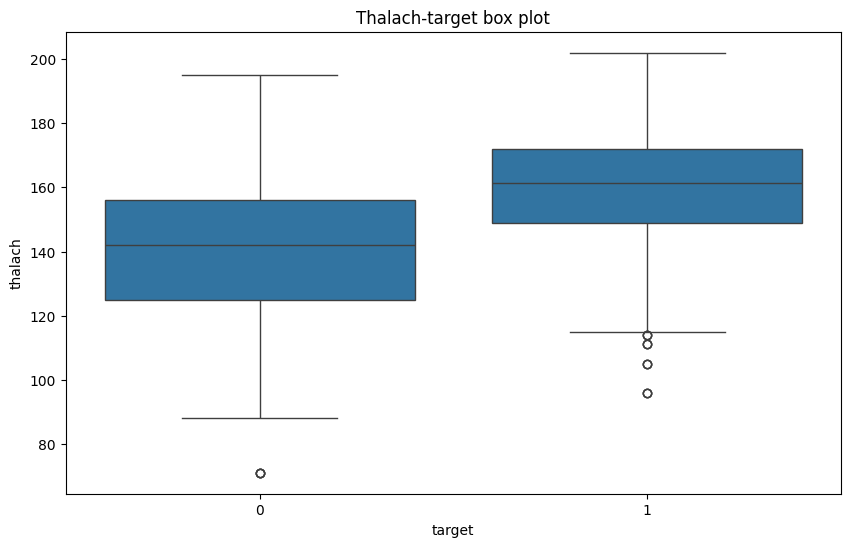

In [279]:
plt.figure(figsize=(10, 6))
plt.title("Thalach-target box plot")
sns.boxplot(y="thalach", x="target", data=df)
plt.show()

C:\Users\Veli\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


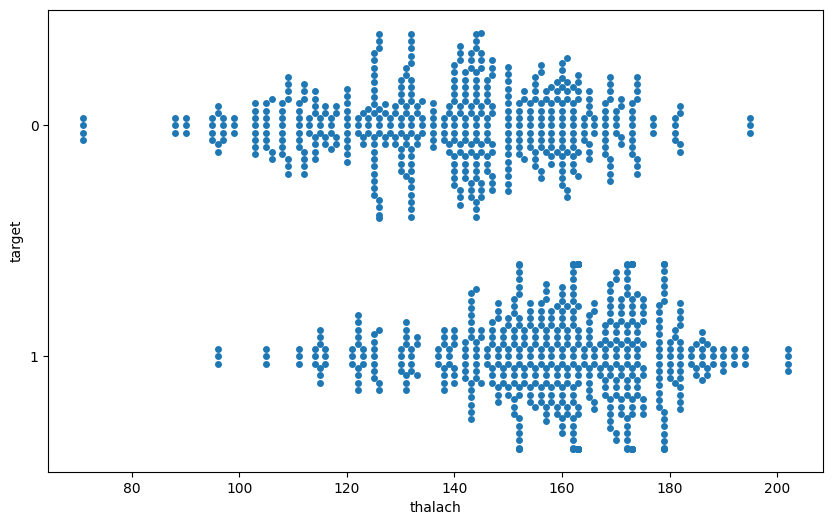

In [280]:
plt.figure(figsize=(10, 6))
sns.swarmplot(y="target", x="thalach", data=df)
plt.show()

<Figure size 1000x600 with 0 Axes>

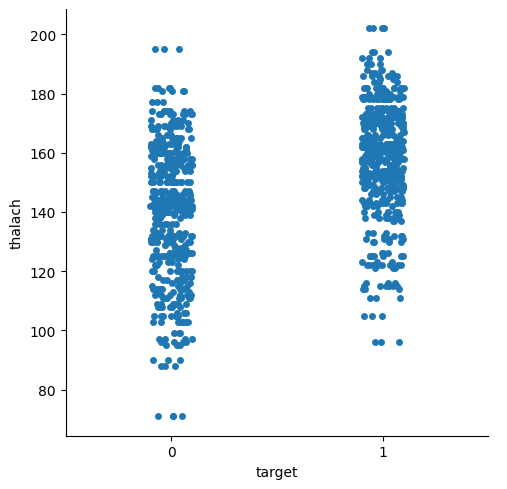

In [281]:
plt.figure(figsize=(10, 6))
sns.catplot(x="target", y="thalach", data=df)
plt.show()

In [282]:
statisticalTest(df, "thalach")

thalach is related to target


In [283]:
# exang

In [284]:
df["exang"].value_counts()

exang
0    680
1    345
Name: count, dtype: int64

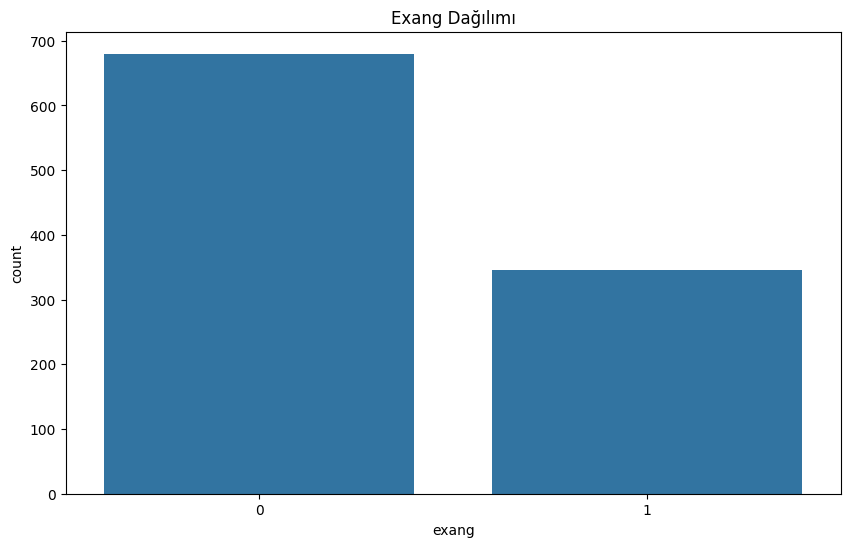

In [285]:
plt.figure(figsize=(10, 6))
plt.title("Exang Dağılımı")
sns.countplot(x="exang", data=df)
plt.show()

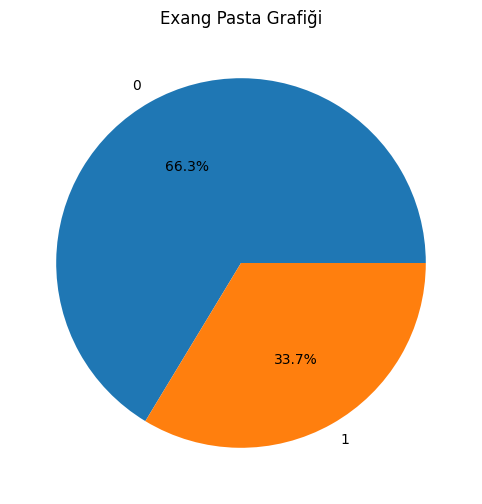

In [286]:
plt.figure(figsize=(10, 6))
plt.title("Exang Pasta Grafiği")
plt.pie(df["exang"].value_counts(), labels=["0", "1"], autopct="%1.1f%%")
plt.show()

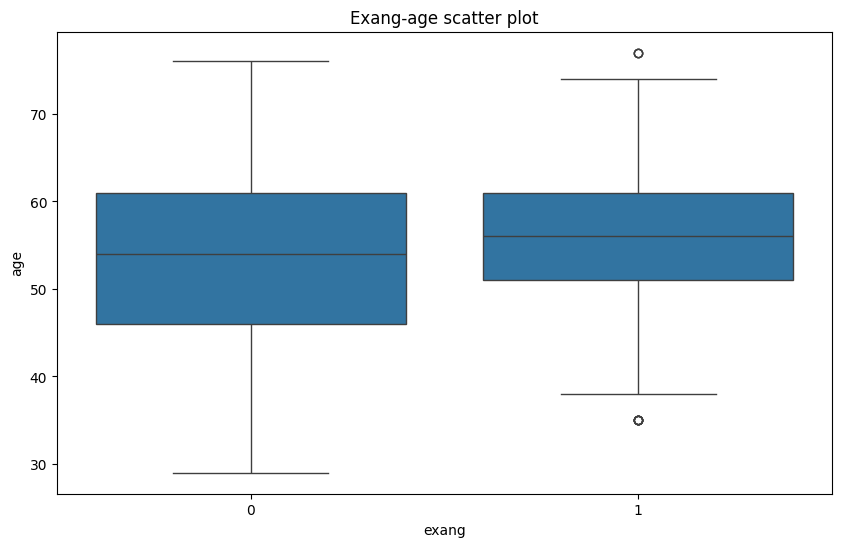

In [287]:
plt.figure(figsize=(10, 6))
plt.title("Exang-age scatter plot")
sns.boxplot(y="age", x="exang", data=df)
plt.show()

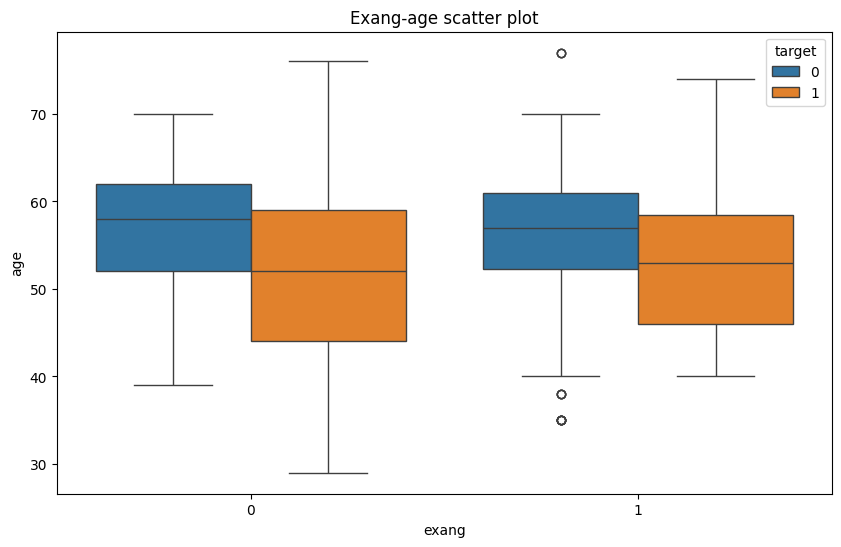

In [288]:
plt.figure(figsize=(10, 6))
plt.title("Exang-age scatter plot")
sns.boxplot(y="age", x="exang", hue="target", data=df)
plt.show()

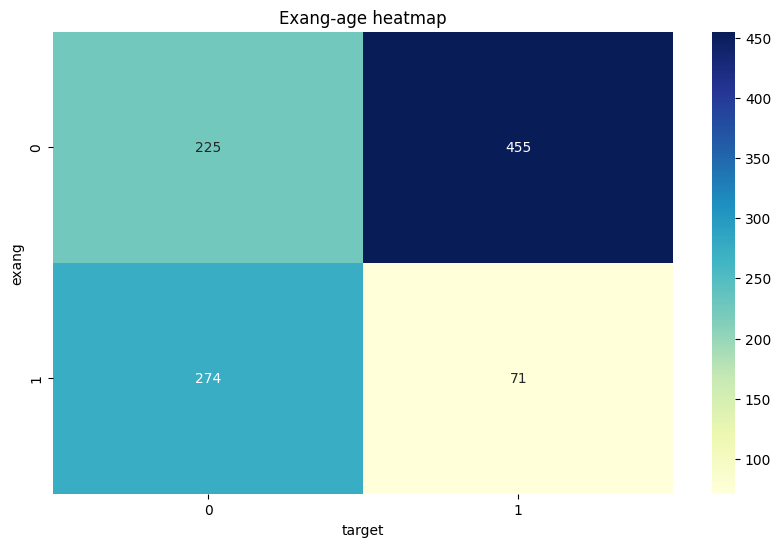

In [289]:
plt.figure(figsize=(10, 6))
plt.title("Exang-age heatmap")
sns.heatmap(pd.crosstab(df["exang"], df["target"]), annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [290]:
statisticalTest(df, "exang")

exang is related to target


In [291]:
df["oldpeak"].describe()

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64

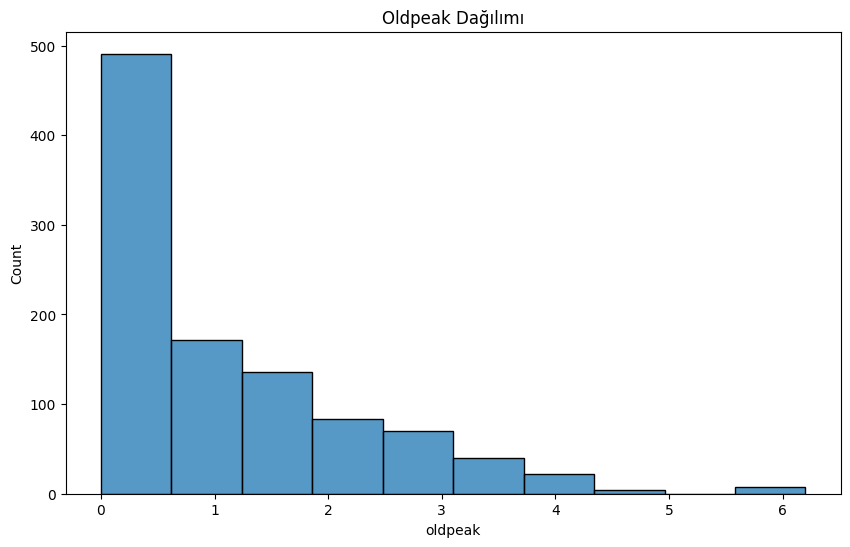

In [292]:
plt.figure(figsize=(10, 6))
plt.title("Oldpeak Dağılımı")
sns.histplot(df["oldpeak"], bins=10)
plt.show()

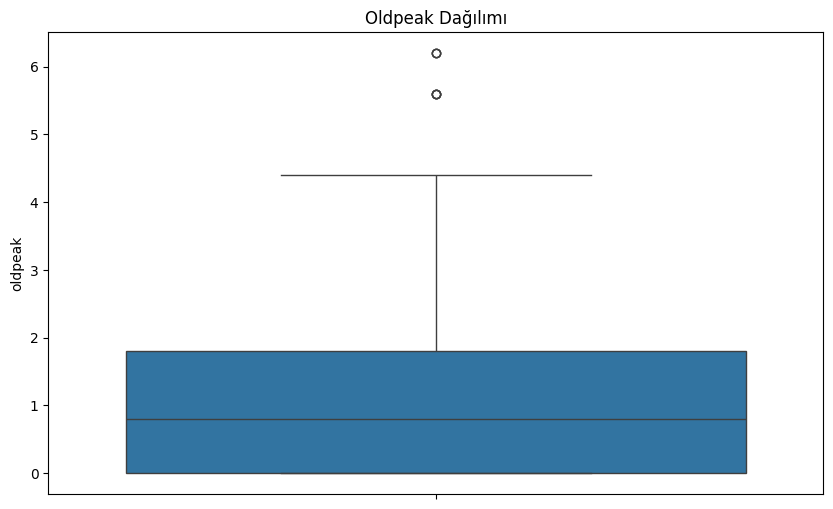

In [293]:
plt.figure(figsize=(10, 6))
plt.title("Oldpeak Dağılımı")
sns.boxplot(y="oldpeak", data=df)
plt.show()

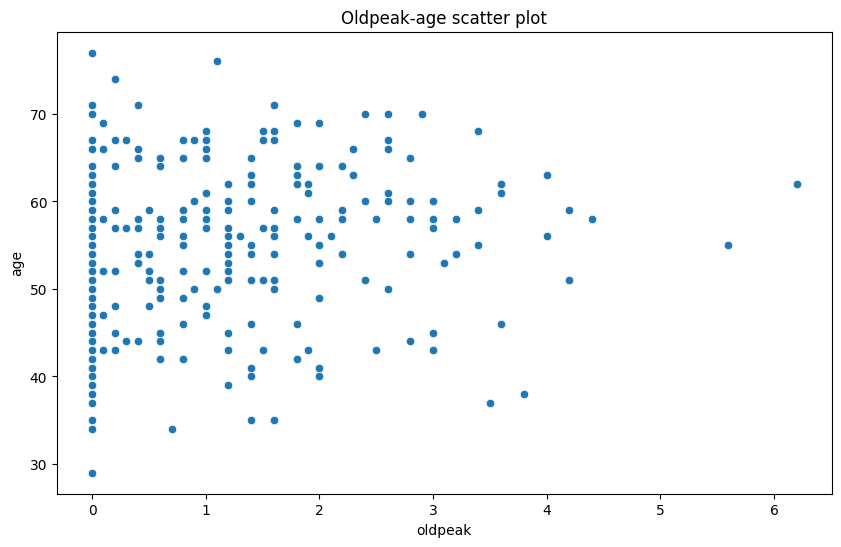

In [294]:
plt.figure(figsize=(10, 6))
plt.title("Oldpeak-age scatter plot")
sns.scatterplot(y="age", x="oldpeak", data=df)
plt.show()

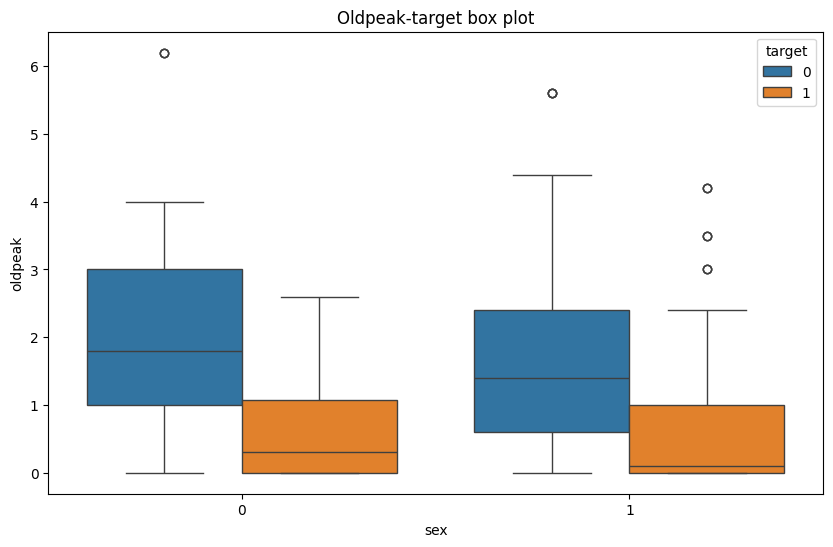

In [295]:
plt.figure(figsize=(10, 6))
plt.title("Oldpeak-target box plot")
sns.boxplot(x="sex", y="oldpeak" ,hue="target", data=df)
plt.show()

In [296]:
statisticalTest(df, "oldpeak")

oldpeak is related to target


In [297]:
# slope

In [298]:
df["slope"].value_counts()

slope
1    482
2    469
0     74
Name: count, dtype: int64

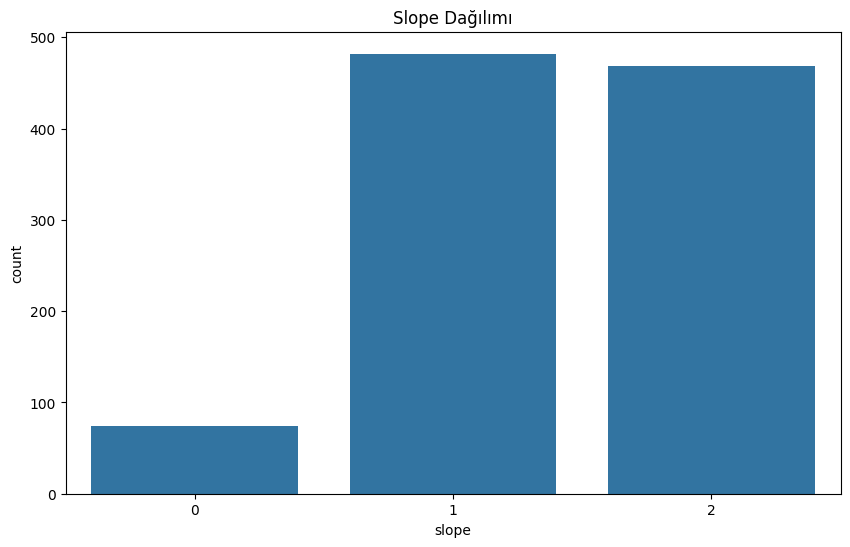

In [299]:
plt.figure(figsize=(10, 6))
plt.title("Slope Dağılımı")
sns.countplot(x="slope", data=df)
plt.show()

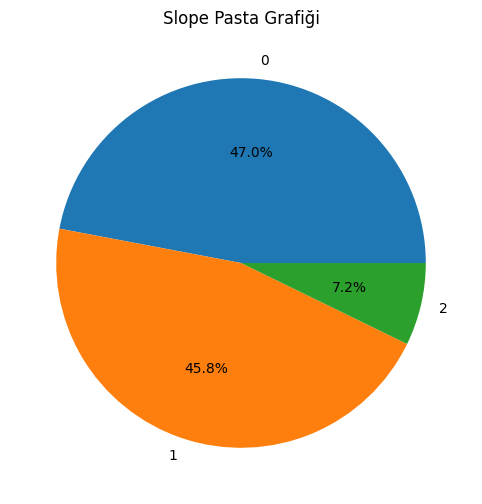

In [300]:
plt.figure(figsize=(10, 6))
plt.title("Slope Pasta Grafiği")
plt.pie(df["slope"].value_counts(), labels=["0", "1", "2"], autopct="%1.1f%%")
plt.show()

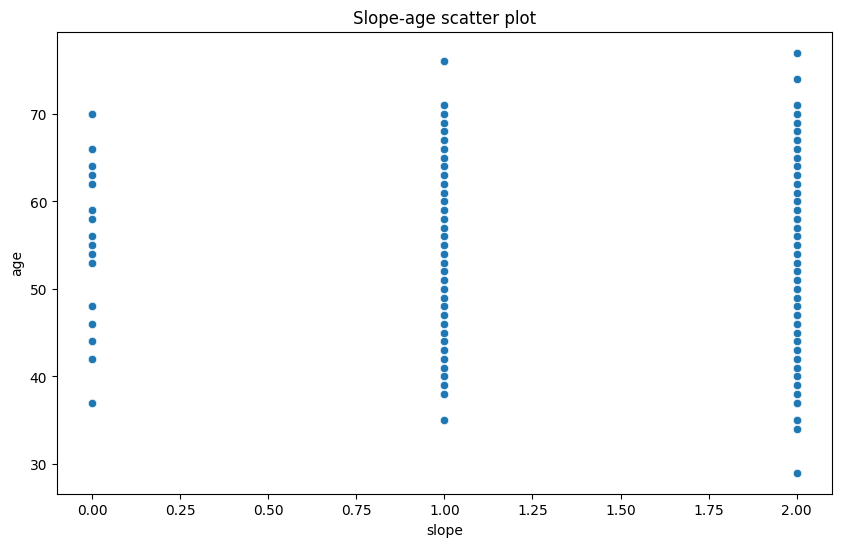

In [301]:
plt.figure(figsize=(10, 6))
plt.title("Slope-age scatter plot")
sns.scatterplot(y="age", x="slope", data=df)
plt.show()

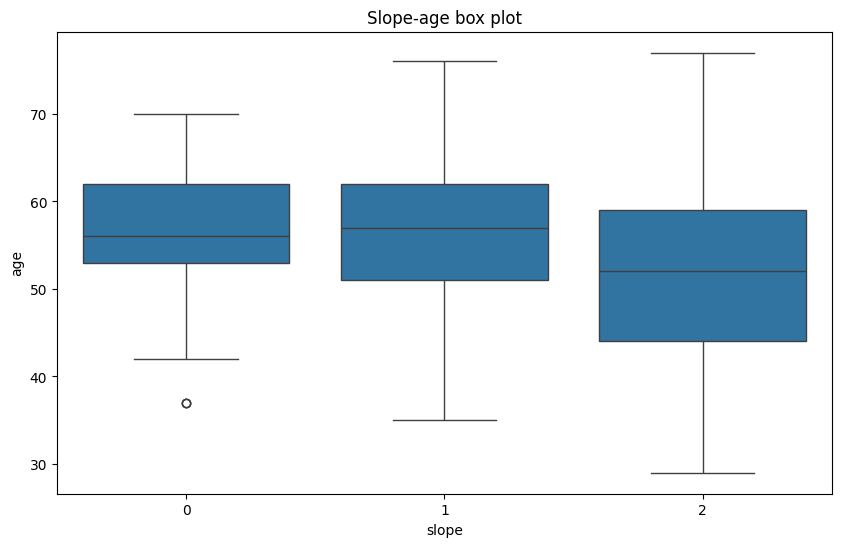

In [302]:
plt.figure(figsize=(10, 6))
plt.title("Slope-age box plot")
sns.boxplot(y="age", x="slope", data=df)
plt.show()

<Axes: title={'center': 'Slope-target box plot'}, xlabel='slope', ylabel='age'>

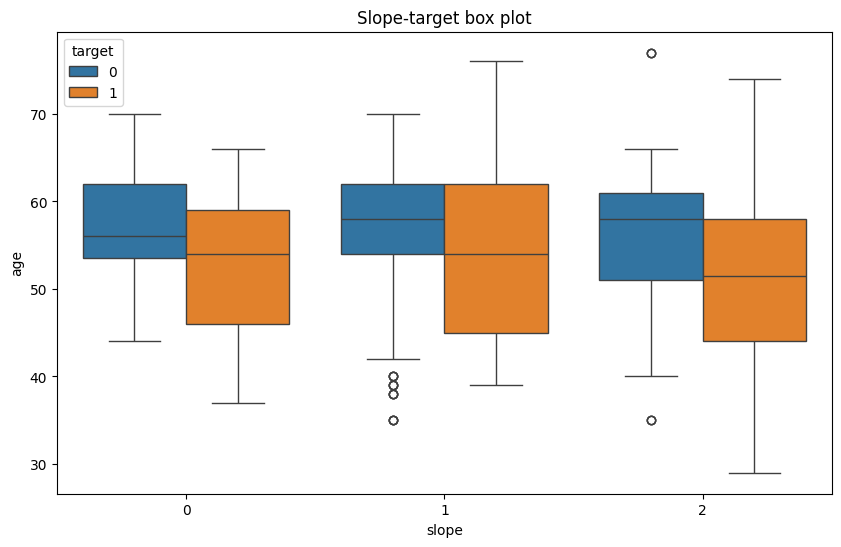

In [303]:
plt.figure(figsize=(10, 6))
plt.title("Slope-target box plot")
sns.boxplot(x="slope", y="age", hue="target", data=df)

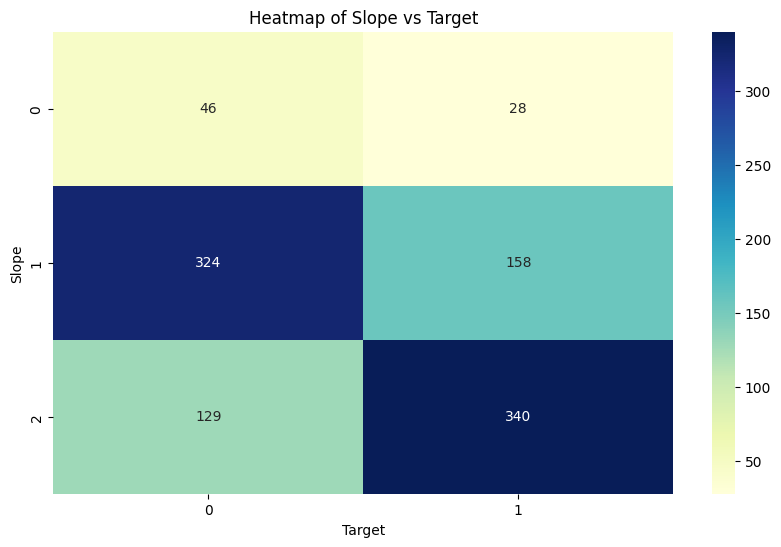

In [304]:
# Create a crosstab of slope and target
crosstab_slope_target = pd.crosstab(df['slope'], df['target'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.title("Heatmap of Slope vs Target")
sns.heatmap(crosstab_slope_target, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Target")
plt.ylabel("Slope")
plt.show()

In [305]:
statisticalTest(df, "slope")

slope is related to target


In [306]:
relationalList

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'slope']

In [307]:
# ca

In [308]:
df["ca"].describe() 

count    1025.000000
mean        0.754146
std         1.030798
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: ca, dtype: float64

In [309]:
df["ca"].value_counts()

ca
0.0    578
1.0    226
2.0    134
3.0     69
4.0     18
Name: count, dtype: int64

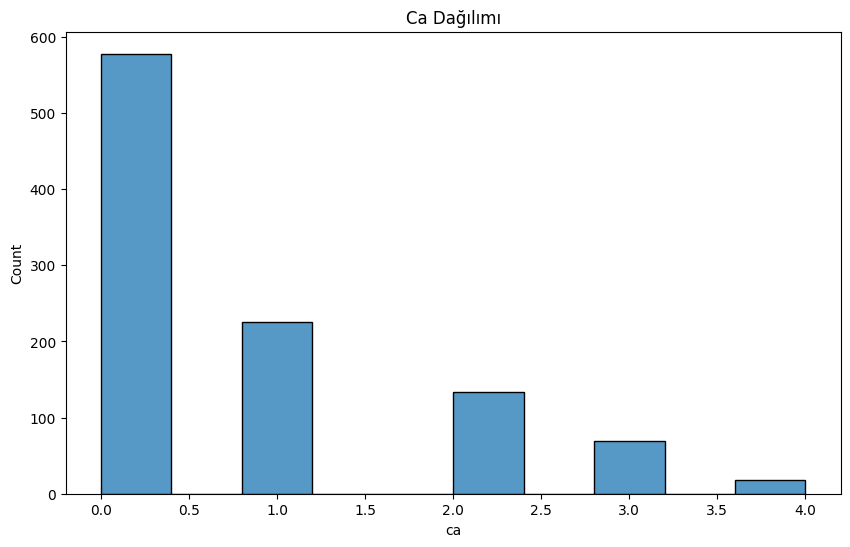

In [310]:
plt.figure(figsize=(10, 6))
plt.title("Ca Dağılımı")
sns.histplot(df["ca"], bins=10)
plt.show()


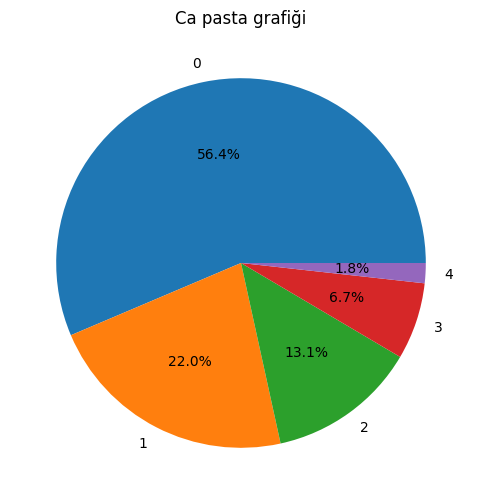

In [311]:
plt.figure(figsize=(10, 6))
plt.title("Ca pasta grafiği")
plt.pie(df["ca"].value_counts(), labels=["0", "1", "2", "3", "4"], autopct="%1.1f%%")
plt.show()

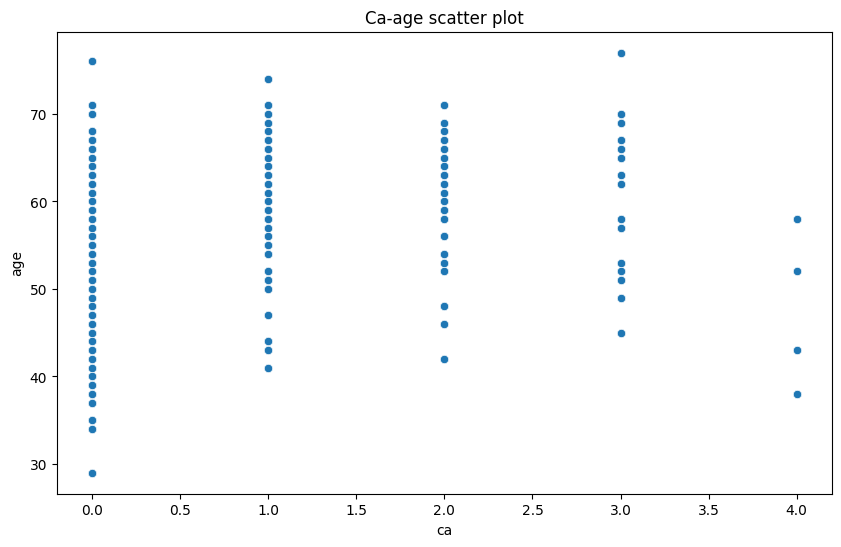

In [312]:
plt.figure(figsize=(10, 6))
plt.title("Ca-age scatter plot")
sns.scatterplot(y="age", x="ca", data=df)
plt.show()

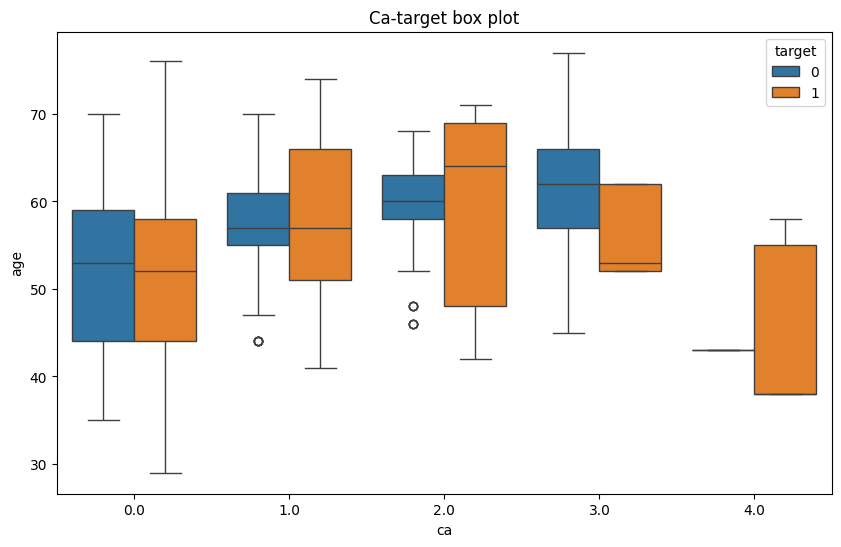

In [313]:
plt.figure(figsize=(10, 6))
plt.title("Ca-target box plot")
sns.boxplot(x="ca", y="age", hue="target", data=df)
plt.show()


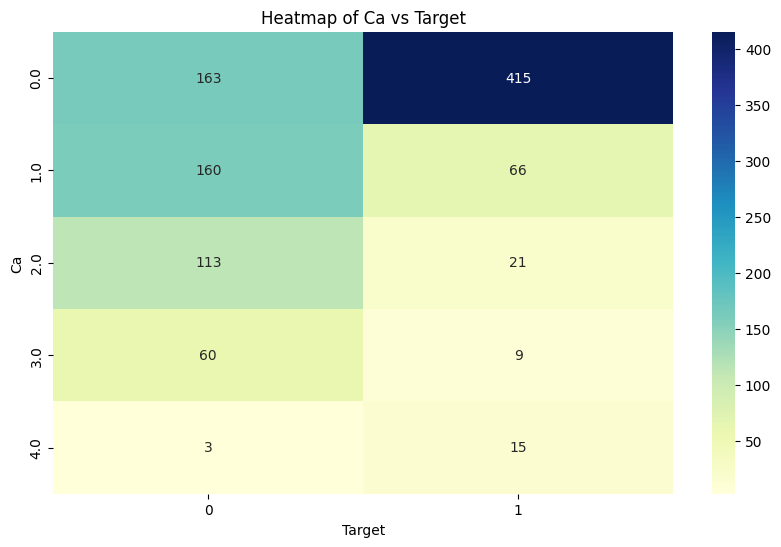

In [314]:
# Create a crosstab of ca and target
crosstab_ca_target = pd.crosstab(df['ca'], df['target'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.title("Heatmap of Ca vs Target")
sns.heatmap(crosstab_ca_target, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Target")
plt.ylabel("Ca")
plt.show()

In [315]:
statisticalTest(df, "ca")

ca is related to target


In [316]:
# thai

In [317]:
df["thal"].describe()

count     1025
unique       4
top          2
freq       544
Name: thal, dtype: int64

In [318]:
df["thal"].value_counts()

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

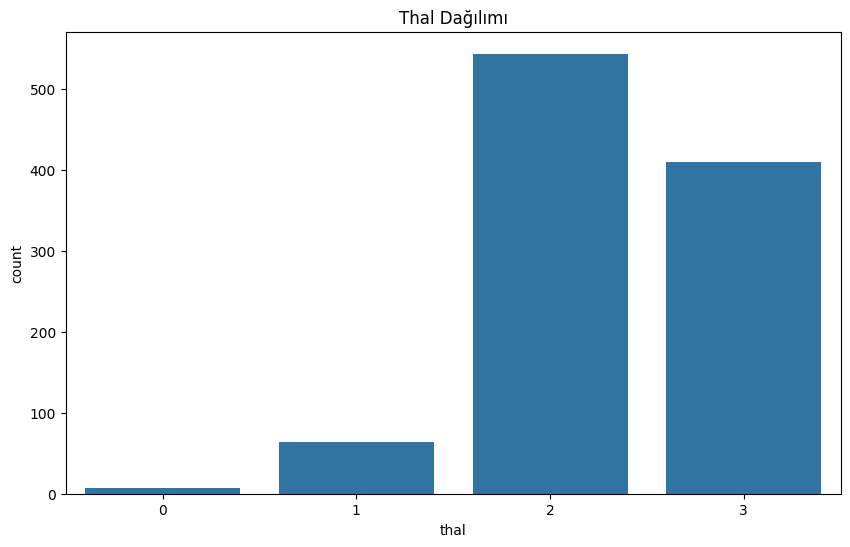

In [319]:
plt.figure(figsize=(10, 6))
plt.title("Thal Dağılımı")
sns.countplot(x="thal", data=df)
plt.show()

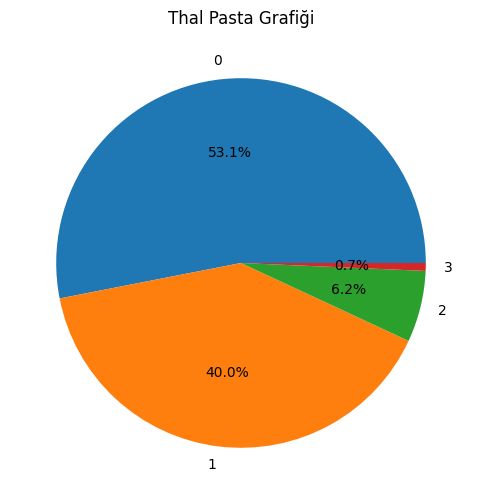

In [320]:
plt.figure(figsize=(10, 6))
plt.title("Thal Pasta Grafiği")
plt.pie(df["thal"].value_counts(), labels=["0", "1", "2", "3"], autopct="%1.1f%%")
plt.show()

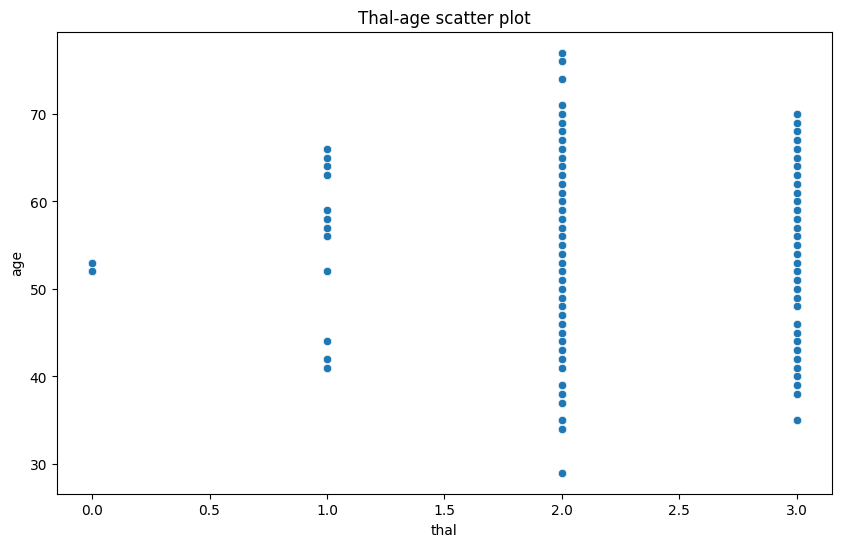

In [321]:
plt.figure(figsize=(10, 6))
plt.title("Thal-age scatter plot")
sns.scatterplot(y="age", x="thal", data=df)
plt.show()

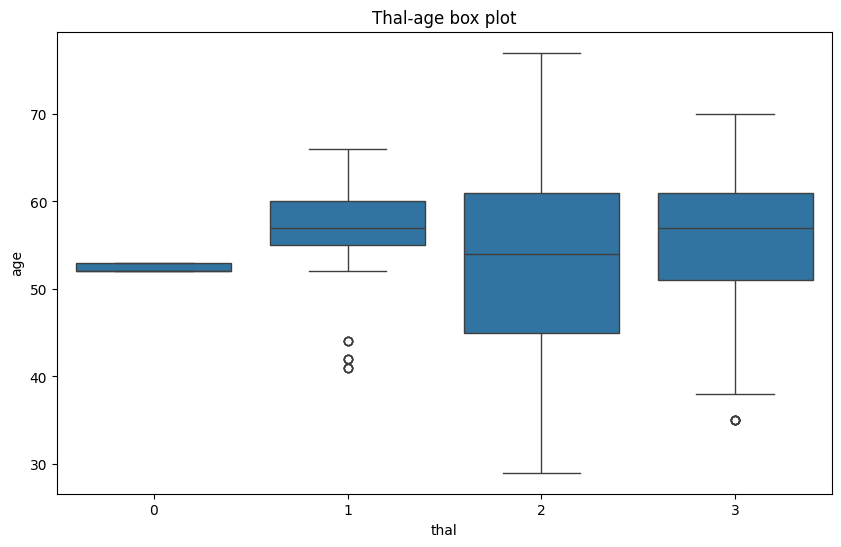

In [322]:
plt.figure(figsize=(10, 6))
plt.title("Thal-age box plot")
sns.boxplot(y="age", x="thal", data=df)
plt.show()

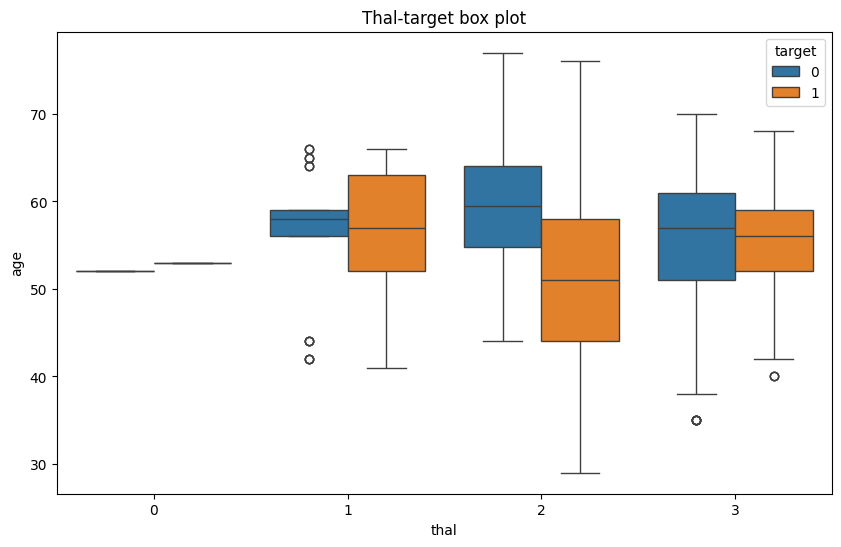

In [323]:
plt.figure(figsize=(10, 6))
plt.title("Thal-target box plot")
sns.boxplot(x="thal", y="age", hue="target", data=df)
plt.show()

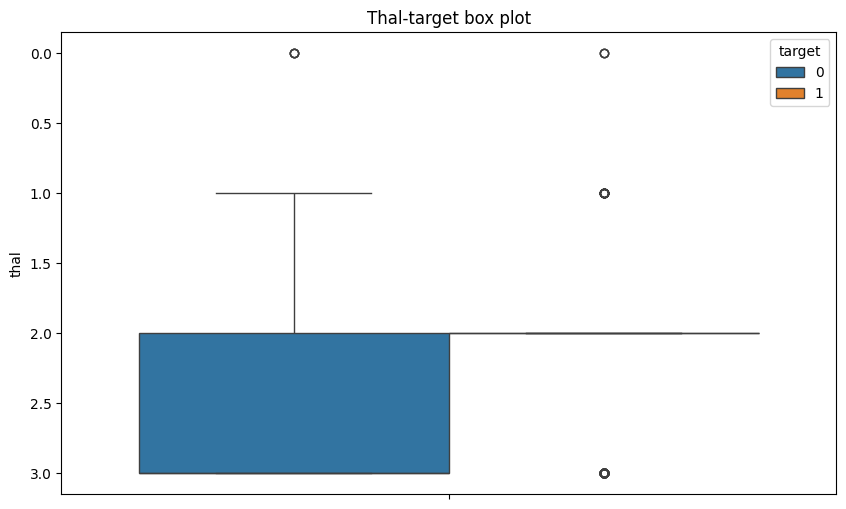

In [324]:
plt.figure(figsize=(10, 6))
plt.title("Thal-target box plot")
sns.boxplot(y="thal", hue="target", data=df)
plt.show()

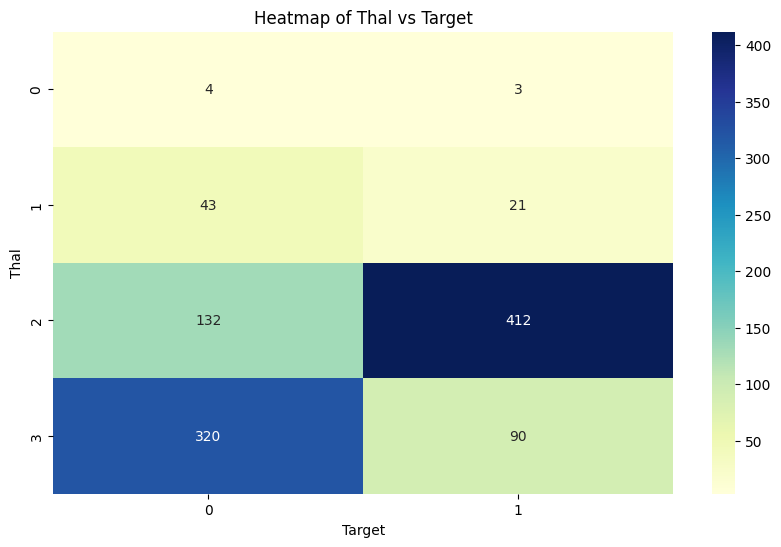

In [325]:
# Create a crosstab of thal and target
crosstab_thal_target = pd.crosstab(df['thal'], df['target'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.title("Heatmap of Thal vs Target")
sns.heatmap(crosstab_thal_target, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Target")
plt.ylabel("Thal")
plt.show()

In [326]:
statisticalTest(df, "thal")

thal is related to target


In [327]:
# MAKİNE ÖĞRENMESİ

In [328]:
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.metrics import roc_auc_score, make_scorer


In [331]:
relationalList

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [373]:
# Eksik değerleri kontrol etme
print(df.isnull().sum())

# Kategorik değişkenleri one-hot encoding ile dönüştürme

# Özellikleri ve hedef değişkeni ayırma
X = df[relationalList]
y = df['target']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Önişleme tamamlandı.")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Önişleme tamamlandı.


In [374]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=500)
}

In [375]:
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

In [376]:
results = []

In [377]:
for name, model in models.items():
    start_time = time()
    scores = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=scoring)
    end_time = time()

    accuracy = scores["test_accuracy"].mean()
    precision = scores["test_precision"].mean()
    recall = scores["test_recall"].mean()
    f1 = scores["test_f1"].mean()
    roc_auc = scores["test_roc_auc"].mean()
    elapsed_time = end_time - start_time

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "Time": elapsed_time
    })

    print(f"{name} completed in {elapsed_time} seconds")


Logistic Regression completed in 0.041579484939575195 seconds
Random Forest completed in 0.5493636131286621 seconds
SVM completed in 0.20450687408447266 seconds
Decision Tree completed in 0.03316903114318848 seconds
KNN completed in 0.0782012939453125 seconds
Naive Bayes completed in 0.030781030654907227 seconds
Gradient Boosting completed in 0.5476055145263672 seconds


C:\Users\Veli\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Veli\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Veli\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Veli\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

AdaBoost completed in 0.341594934463501 seconds
Bagging Classifier completed in 0.12174367904663086 seconds


C:\Users\Veli\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Veli\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Veli\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Veli\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier completed in 3.082294464111328 seconds


C:\Users\Veli\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [378]:
results_df = pd.DataFrame(results)

In [379]:
results_df = results_df.sort_values("Accuracy", ascending=False)

In [380]:
results_df

,Model,Accuracy,Precision,Recall,F1,ROC AUC,Time
1,Random Forest,0.980488,0.979161,0.983473,0.981117,0.993733,0.549364
3,Decision Tree,0.980488,0.984002,0.978768,0.980869,0.980634,0.033169
9,MLP Classifier,0.973171,0.967994,0.981120,0.974334,0.985024,3.082294
8,Bagging Classifier,0.971951,0.974892,0.971653,0.972939,0.991827,0.121744
6,Gradient Boosting,0.957317,0.946636,0.974062,0.959619,0.985319,0.547606
2,SVM,0.921951,0.928113,0.922129,0.924423,0.964566,0.204507
7,AdaBoost,0.909756,0.907944,0.919608,0.913462,0.966262,0.341595
0,Logistic Regression,0.850000,0.824745,0.903025,0.861603,0.922196,0.041579
4,KNN,0.847561,0.842389,0.872437,0.855847,0.942173,0.078201
5,Naive Bayes,0.830488,0.819769,0.860504,0.839561,0.910523,0.030781


C:\Users\Veli\AppData\Local\Temp\ipykernel_23160\3909022283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


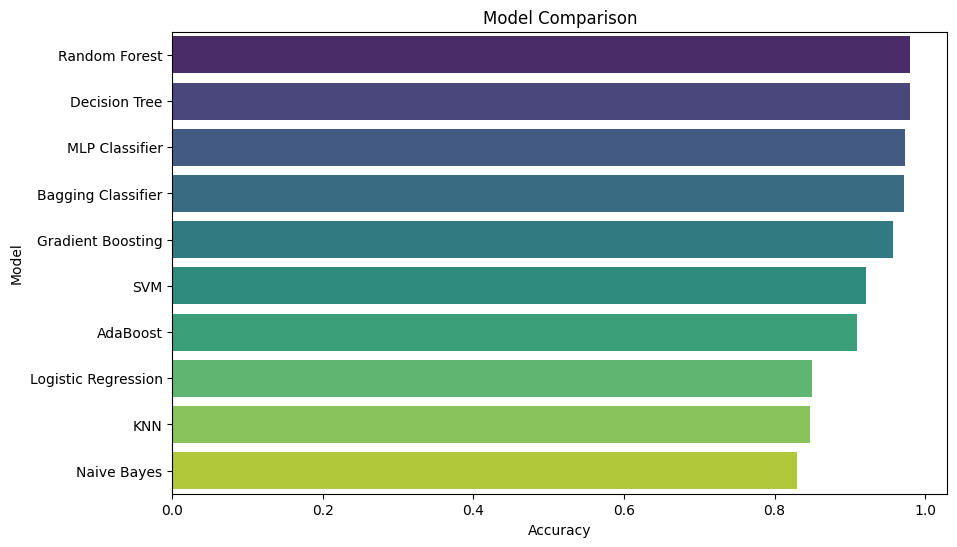

In [381]:
plt.figure(figsize=(10, 6))
plt.title("Model Comparison")
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.show()

C:\Users\Veli\AppData\Local\Temp\ipykernel_23160\1805693671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Precision", y="Model", data=results_df, palette="viridis")


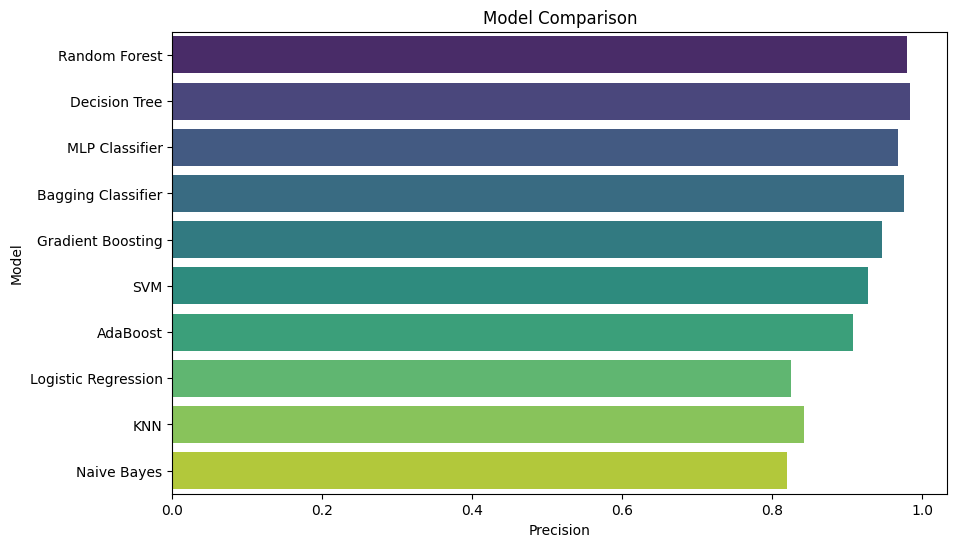

In [382]:
plt.figure(figsize=(10, 6))
plt.title("Model Comparison")
sns.barplot(x="Precision", y="Model", data=results_df, palette="viridis")
plt.show()

C:\Users\Veli\AppData\Local\Temp\ipykernel_23160\288996095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1", y="Model", data=results_df, palette="viridis")


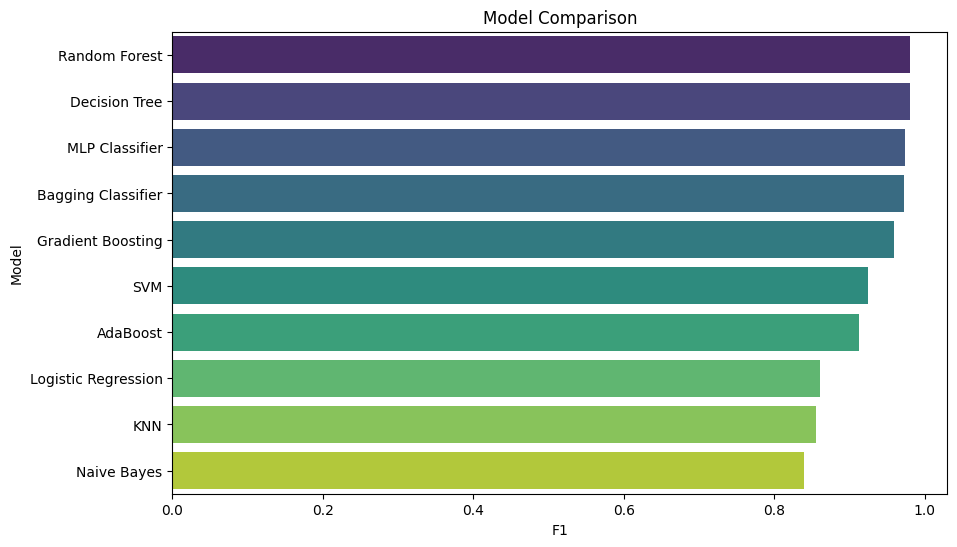

In [383]:
plt.figure(figsize=(10, 6))
plt.title("Model Comparison")
sns.barplot(x="F1", y="Model", data=results_df, palette="viridis")
plt.show()

C:\Users\Veli\AppData\Local\Temp\ipykernel_23160\2132127609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Time", y="Model", data=results_df, palette="viridis")


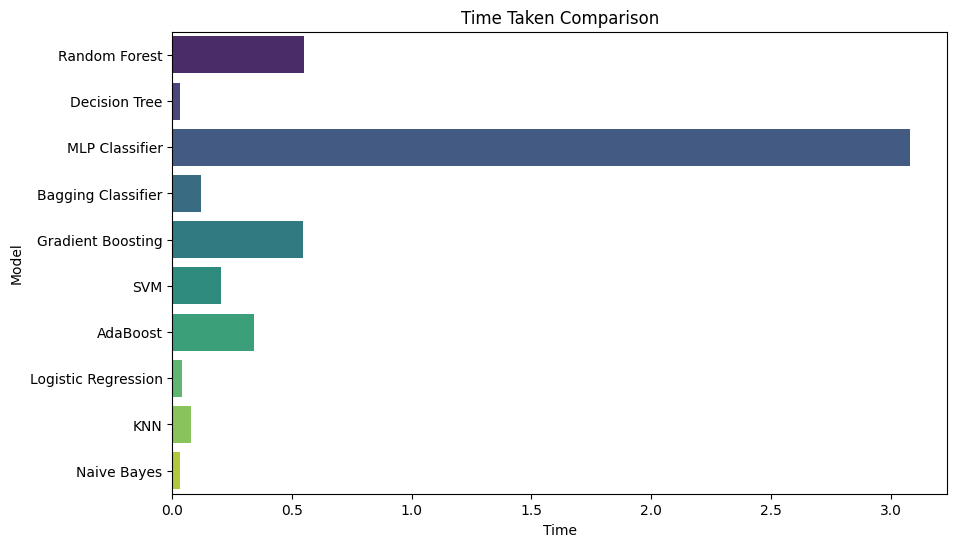

In [384]:
plt.figure(figsize=(10, 6))
plt.title("Time Taken Comparison")
sns.barplot(x="Time", y="Model", data=results_df, palette="viridis")
plt.show()

In [385]:
# Hyperparameter Tuning
param_grid = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [5, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [386]:
print("Best parameters: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score:  0.9841463414634146


In [387]:
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test accuracy after tuning: {accuracy_rf:.4f}")

Random Forest Test accuracy after tuning: 0.9854


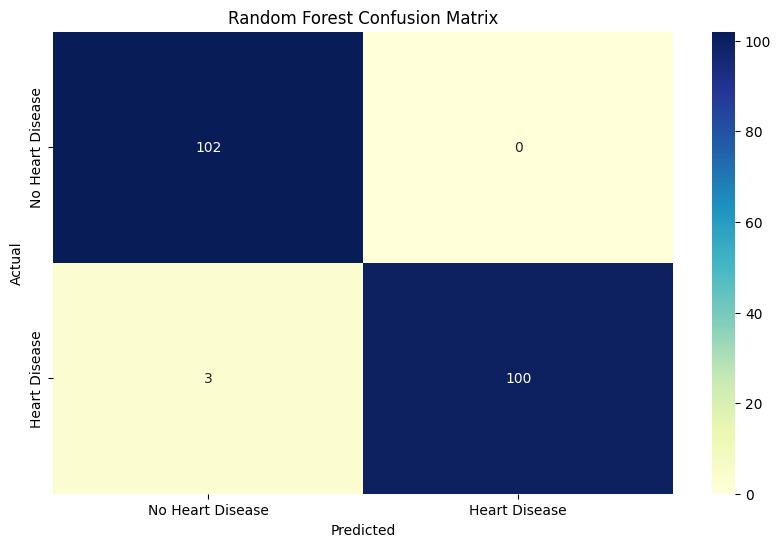

In [388]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 6))
plt.title("Random Forest Confusion Matrix")
xticklabels = ["No Heart Disease", "Heart Disease"]
yticklabels = ["No Heart Disease", "Heart Disease"]
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu", xticklabels=xticklabels, yticklabels=yticklabels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [389]:
report_rf = classification_report(y_test, y_pred_rf)
target_names = ["No Heart Disease", "Heart Disease"]
print(report_rf)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

